# Capstone : Data Analysis of Transjakarta 

## importing library

In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import geopandas as gpd

In [264]:
df=pd.read_csv('Transjakarta.csv')


## Data Cleaning

### Data Checking

In [265]:
df.head(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,106.81632,3,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,...,106.83059,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0
9,ERXO372B2H63RB,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,0.0,B05781P,...,106.77889,15,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,-6.243426,106.80188,24.0,2023-04-03 06:51:12,3500.0


In [266]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

### Checking duplicate

In [267]:
print(df.duplicated().sum())

0


In [270]:
corridor_id_name_samples = df[['corridorID', 'corridorName']].head(10)
tap_out_samples = df[['tapOutStops', 'tapOutStopsName']].head(10)
tap_in_samples = df[['tapInStops', 'tapOutStopsName']].head(10)
print(tap_in_samples)
print(tap_out_samples)
print(corridor_id_name_samples)

  tapInStops        tapOutStopsName
0     P00142                Tegalan
1    B01963P    Sampoerna Strategic
2    B00499P  Simpang Kunir Kemukus
3    B05587P      Raya Penggilingan
4     P00239       Kali Besar Barat
5    B00127P            Grand Sahid
6    B00243P                    NaN
7    B03416P             Jln. Baros
8    B00795P           Kayuringin 2
9    B05781P         Blok M Jalur 3
  tapOutStops        tapOutStopsName
0      P00253                Tegalan
1     B03307P    Sampoerna Strategic
2     B04962P  Simpang Kunir Kemukus
3     B03090P      Raya Penggilingan
4      P00098       Kali Besar Barat
5     B00694P            Grand Sahid
6         NaN                    NaN
7     B00899P             Jln. Baros
8     B01853P           Kayuringin 2
9     B06578P         Blok M Jalur 3
  corridorID                              corridorName
0          5                     Matraman Baru - Ancol
1         6C  Stasiun Tebet - Karet via Patra Kuningan
2        R1A                    

### Checking null

In [271]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

### Removing null in name

First we try to check if manual changes still possible to be made

In [272]:
nan_rows = df[df.isna().any(axis=1)]

# Display the rows with NaN values
print(nan_rows)

              transID         payCardID payCardBank            payCardName  \
6      HEMW326B9N91TV   213155822653833      emoney  R. Devi Hariyah, S.T.   
7      XTKE052E5E87LN  3587341902618993         dki        Darmanto Rajasa   
11     IIEK980X1O23NZ   347204308990092      emoney  R.M. Labuh Laksmiwati   
21     ZJVI960B9I42DA   343851798729291      emoney           Garang Utama   
30     TCKQ601Q5O01BC  3589380857722689         dki  drg. Lukman Hidayanto   
...               ...               ...         ...                    ...   
37878  FFUS474T7Q54QF    36067042340502         bni         Jatmiko Mansur   
37882  YMCL988A7J02QF   180074952289665      emoney        Asmadi Setiawan   
37885  KUXY021D6I25YN    30169751274025         bni        Prasetya Wasita   
37887  UELP204M1S64QX  4068989702474318         dki         Ajimat Pradana   
37889  FSZU331F3O29PS     4300800810103      online         Faizah Samosir   

      payCardSex  payCardBirthDate corridorID                  

In [12]:
df.loc[6]

transID                    HEMW326B9N91TV
payCardID                 213155822653833
payCardBank                        emoney
payCardName         R. Devi Hariyah, S.T.
payCardSex                              M
payCardBirthDate                     1974
corridorID                         JAK.18
corridorName          Kalibata - Kuningan
direction                             0.0
tapInStops                        B00243P
tapInStopsName            Cervino Village
tapInStopsLat                   -6.224355
tapInStopsLon                   106.85165
stopStartSeq                           25
tapInTime             2023-04-03 06:58:21
tapOutStops                           NaN
tapOutStopsName                       NaN
tapOutStopsLat                        NaN
tapOutStopsLon                        NaN
stopEndSeq                            NaN
tapOutTime                            NaN
payAmount                             0.0
Name: 6, dtype: object

In [273]:
null_tapout_stops = df[df['tapOutStops'].isnull()]
null_tapin_stops = df[df['tapInStops'].isnull()]

# Print rows where tapOutStops is null
print("Rows with Null Tap-Out Stops:")
print(null_tapout_stops)

Rows with Null Tap-Out Stops:
              transID         payCardID payCardBank  \
6      HEMW326B9N91TV   213155822653833      emoney   
30     TCKQ601Q5O01BC  3589380857722689         dki   
70     OTGH855B8A29BP  3549158005951908         dki   
89     QMHC825R0K38KM  3537543297101185         dki   
130    JUKK703H7F00XH      570918242399       flazz   
...               ...               ...         ...   
37796  UJTW104Z9P85GX  6507084113625619         dki   
37799  GRKE798M1S93HC  4897976988760145         dki   
37878  FFUS474T7Q54QF    36067042340502         bni   
37887  UELP204M1S64QX  4068989702474318         dki   
37889  FSZU331F3O29PS     4300800810103      online   

                     payCardName payCardSex  payCardBirthDate corridorID  \
6          R. Devi Hariyah, S.T.          M              1974     JAK.18   
30         drg. Lukman Hidayanto          M              1995     JAK.46   
70     Mustofa Wijayanti, M.Farm          M              1981         1T   
89   

In [274]:
print("\nRows with Null Tap-In Stops:")
print(null_tapin_stops)


Rows with Null Tap-In Stops:
              transID            payCardID payCardBank  \
21     ZJVI960B9I42DA      343851798729291      emoney   
41     VUWZ891M7I57EB      344303671677311      emoney   
101    XVWU715D9V59FV  4744480387450088900      brizzi   
122    ENXD420E9G92TO     4817620823758230         dki   
163    SRLS290P0Y95NP      180074853270640      emoney   
...               ...                  ...         ...   
37775  MYWZ762F5O31MX      344406439989280      emoney   
37816  HRMG833E4D75MZ     2264435942253035         dki   
37822  XWEY170L8K03CW     3538799233101916         dki   
37855  OCHT739D6O31VL        4434749577653      online   
37869  HZUZ464I4K08ZH       38956653374453         bni   

                   payCardName payCardSex  payCardBirthDate corridorID  \
21                Garang Utama          F              1997     JAK.16   
41      R. Mila Wahyuni, S.Sos          F              2006        R1A   
101              Galur Riyanti          F          

In [126]:
(df.loc[6])

transID                    HEMW326B9N91TV
payCardID                 213155822653833
payCardBank                        emoney
payCardName         R. Devi Hariyah, S.T.
payCardSex                              M
payCardBirthDate                     1974
corridorID                         JAK.18
corridorName          Kalibata - Kuningan
direction                             0.0
tapInStops                        B00243P
tapInStopsName            Cervino Village
tapInStopsLat                   -6.224355
tapInStopsLon                   106.85165
stopStartSeq                           25
tapInTime             2023-04-03 06:58:21
tapOutStops                           NaN
tapOutStopsName                       NaN
tapOutStopsLat                        NaN
tapOutStopsLon                        NaN
stopEndSeq                            NaN
tapOutTime                            NaN
payAmount                             0.0
Name: 6, dtype: object

In [100]:
baros_stops = df[(df['tapInStopsName'] == 'Jln. Baros') | (df['tapOutStopsName'] == 'Jln. Baros')]
baros_stops

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
607,ANPP957E3D42EG,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1.0,B03416P,...,106.80221,2,2023-04-04 06:02:32,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-04 06:46:06,0.0
1207,HLBU142F8F30VI,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1.0,B03416P,...,106.80221,2,2023-04-05 05:39:14,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-05 06:11:17,0.0
1807,DWVS480Y1D45FZ,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1.0,B03416P,...,106.80221,2,2023-04-06 06:46:47,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-06 07:40:38,0.0
2407,XRQW961M3P61IA,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1.0,B03416P,...,106.80221,2,2023-04-07 05:39:10,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-07 06:07:48,0.0
3007,ZIBR792O9I64YB,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1.0,B03416P,...,106.80221,2,2023-04-10 06:32:17,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-10 07:19:57,0.0
3607,FPKA947T3M32XR,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1.0,B03416P,...,106.80221,2,2023-04-11 05:43:15,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-11 06:04:22,0.0
4207,ZJKV682C2F81HU,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1.0,B03416P,...,106.80221,2,2023-04-12 05:51:40,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-12 06:47:07,0.0
4807,LAWN128N2D67AG,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1.0,B03416P,...,106.80221,2,2023-04-13 05:47:25,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-13 06:09:47,0.0
5407,DLVD426R4G89IB,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1.0,B03416P,...,106.80221,2,2023-04-14 05:45:56,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-14 06:44:45,0.0


In [140]:
df.at[7, 'corridorID'] = 'JAK.03'
df.at[7, 'corridorName'] = 'Lebak Bulus - Andara'

print(df.loc[7])

transID                   XTKE052E5E87LN
payCardID               3587341902618993
payCardBank                          dki
payCardName              Darmanto Rajasa
payCardSex                             F
payCardBirthDate                    1991
corridorID                        JAK.03
corridorName        Lebak Bulus - Andara
direction                            1.0
tapInStops                       B03416P
tapInStopsName        SDN Pondok Labu 11
tapInStopsLat                  -6.313269
tapInStopsLon                  106.80221
stopStartSeq                           2
tapInTime            2023-04-03 06:44:24
tapOutStops                      B00899P
tapOutStopsName               Jln. Baros
tapOutStopsLat                 -6.311046
tapOutStopsLon                   106.784
stopEndSeq                          12.0
tapOutTime           2023-04-03 07:11:43
payAmount                            0.0
Name: 7, dtype: object


In [141]:
#Corridor ID M11
df[(df['corridorID'] == 'M11')]
df[(df['tapOutStopsName'] == 'Walikota Jakarta Timur')]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
89,QMHC825R0K38KM,3537543297101185,dki,Samsul Ramadan,M,1966,M11,NaN,1.0,P00158,...,106.90591,0,2023-04-03 06:23:36,NaN,Walikota Jakarta Timur,-6.21254,106.94537,7.0,2023-04-03 06:52:14,3500.0
223,TVHS564M5J08TK,4607578492019777,dki,Mutia Latupono,M,2002,11D,Pulo Gebang - Pulo Gadung 2 via PIK,1.0,B02977P,...,106.93258,24,2023-04-03 05:29:24,P00270,Walikota Jakarta Timur,-6.21254,106.94537,30.0,2023-04-03 05:52:11,3500.0
557,QCKF977S3X37LU,4281653494791,online,Zelda Wibowo,M,1989,11D,Pulo Gebang - Pulo Gadung 2 via PIK,1.0,B03101P,...,106.92803,21,2023-04-03 17:22:02,P00270,Walikota Jakarta Timur,-6.21254,106.94537,30.0,2023-04-03 18:32:14,3500.0
689,BOBY298Z6W23PU,3537543297101185,dki,Samsul Ramadan,M,1966,M11,Pulo Gebang - Pulo Gadung 2,1.0,P00158,...,106.90591,0,2023-04-04 05:26:00,P00270,Walikota Jakarta Timur,-6.21254,106.94537,7.0,2023-04-04 06:20:10,3500.0
823,DHIO551U4X23TR,4607578492019777,dki,Mutia Latupono,M,2002,11D,Pulo Gebang - Pulo Gadung 2 via PIK,1.0,B02977P,...,106.93258,24,2023-04-04 05:05:17,P00270,Walikota Jakarta Timur,-6.21254,106.94537,30.0,2023-04-04 05:36:02,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33537,XFMP824P7B94IX,2692738856680636,dki,Aurora Rahimah,F,1987,11,Pulo Gebang - Matraman,1.0,P00151,...,106.87819,3,2023-04-23 20:22:24,P00270,Walikota Jakarta Timur,-6.21254,106.94537,13.0,2023-04-23 22:18:56,3500.0
33552,UCOT590H4A15MH,371996902605484,emoney,Yuliana Hakim,M,2001,11K,Rusun Komarudin - Penggilingan,0.0,B03281P,...,106.94252,0,2023-04-23 19:10:36,P00270,Walikota Jakarta Timur,-6.21254,106.94537,1.0,2023-04-23 20:57:13,0.0
33692,KBIQ806G7O30HW,5127142251737778,dki,Maimunah Melani,F,1988,11K,Rusun Komarudin - Penggilingan,0.0,B03281P,...,106.94252,0,2023-04-22 12:56:57,P00270,Walikota Jakarta Timur,-6.21254,106.94537,1.0,2023-04-22 13:57:32,0.0
33742,GUUM610Y4K57MG,2260346863403083,dki,"Sabri Marbun, S.T.",F,1965,11Q,Kampung Melayu - Pulo Gebang via BKT,1.0,B05581P,...,106.92356,22,2023-04-22 17:01:46,P00270,Walikota Jakarta Timur,-6.21254,106.94537,26.0,2023-04-22 17:21:07,3500.0


In [142]:
df.at[89, 'corridorName'] = 'Pulo Gebang - Pulo Gadung 2'
df.at[89, 'tapOutStops'] = 'P00270'
df.loc[89]

transID                          QMHC825R0K38KM
payCardID                      3537543297101185
payCardBank                                 dki
payCardName                      Samsul Ramadan
payCardSex                                    M
payCardBirthDate                           1966
corridorID                                  M11
corridorName        Pulo Gebang - Pulo Gadung 2
direction                                   1.0
tapInStops                               P00158
tapInStopsName                Pasar Pulo Gadung
tapInStopsLat                         -6.187434
tapInStopsLon                         106.90591
stopStartSeq                                  0
tapInTime                   2023-04-03 06:23:36
tapOutStops                              P00270
tapOutStopsName          Walikota Jakarta Timur
tapOutStopsLat                         -6.21254
tapOutStopsLon                        106.94537
stopEndSeq                                  7.0
tapOutTime                  2023-04-03 0

### Checking Null again

In [143]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1256
corridorName        1928
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2288
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

## Creating mapping

### We try to clean the data by using mapping as the reference 

In [144]:
mapping_df = df.dropna(subset=['tapInStopsName', 'tapOutStopsName', 'corridorID', 'corridorName']).drop_duplicates(subset=['tapInStopsName', 'tapOutStopsName','corridorID','corridorName'])
mapping_df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37893,GNET512K3A93CA,3500965207195341,dki,Latika Salahudin,F,2000,JAK.80,Rawa Buaya - Rawa Kompeni,0.0,B02485P,...,106.70237,39,2023-04-19 08:16:10,B03053P,Puskesmas Kel. Kamal II,-6.100938,106.69786,42.0,2023-04-19 10:32:30,0.0
37894,ZXVG342K6T27GU,4475487986105118550,brizzi,"Tgk. Dipa Purnawati, S.E.I",F,2012,JAK.39,Kalimalang - Duren Sawit,0.0,B04489P,...,106.94229,27,2023-04-14 11:36:12,B01624P,Jln. Swakarsa III Pondok Kelapa,-6.244759,106.94249,35.0,2023-04-14 13:15:25,0.0
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [275]:
# Merge the main DataFrame with the mapping DataFrame on both tapInStopsName and tapOutStopsName
df_merged = df.merge(mapping_df[['tapInStopsName', 'tapOutStopsName', 'tapInStops', 'tapOutStops', 'corridorID', 'corridorName']], 
                     on=['tapInStopsName', 'tapOutStopsName'], 
                     how='left', 
                     suffixes=('', '_map'))

# Fill NaN values in tapInStops, tapOutStops, corridorID, and corridorName with values from the mapping
df_merged['tapInStops'] = df_merged['tapInStops'].combine_first(df_merged['tapInStops_map'])
df_merged['tapOutStops'] = df_merged['tapOutStops'].combine_first(df_merged['tapOutStops_map'])
df_merged['corridorID'] = df_merged['corridorID'].combine_first(df_merged['corridorID_map'])
df_merged['corridorName'] = df_merged['corridorName'].combine_first(df_merged['corridorName_map'])

# Drop the temporary columns created during the merge
df_merged = df_merged.drop(columns=['tapInStops_map', 'tapOutStops_map', 'corridorID_map', 'corridorName_map'])


In [276]:
df_merged.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           133
corridorName         200
direction              0
tapInStops           227
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1497
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1161
dtype: int64

In [277]:
rows_with_nan = df_merged[df_merged.isna().any(axis=1)]
rows_with_nan

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,...,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
23,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0
32,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
43,VUWZ891M7I57EB,344303671677311,emoney,"R. Mila Wahyuni, S.Sos",F,2006,R1A,Pantai Maju - Kota,1.0,NaN,...,106.79409,12,2023-04-03 06:50:06,B00242P,Centro Metro Broadway,-6.116362,106.76143,29.0,2023-04-03 07:30:53,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41339,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,...,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
41343,YMCL988A7J02QF,180074952289665,emoney,Asmadi Setiawan,F,1971,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B01732P,...,106.86825,11,2023-04-30 08:41:09,B01169P,Jln. Jatinegara Timur IV,-6.222457,106.86816,13.0,2023-04-30 10:07:19,NaN
41346,KUXY021D6I25YN,30169751274025,bni,Prasetya Wasita,M,1986,3B,NaN,1.0,B04610P,...,106.72736,2,2023-04-08 10:46:06,B00192P,BSI Cengkareng,-6.147973,106.72781,3.0,2023-04-08 13:06:42,0.0
41348,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,...,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


In [259]:
rows_with_corridor_nan = df_merged[df_merged['corridorName'].isna()]
rows_with_corridor_nan

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,payAmount,tapInHour,tapOutHour,tapInDay,duration,lat_diff,lon_diff,startRegion,endRegion,region
35023,FQJT246L6N46RD,379311975236617,emoney,Gilda Kusumo,F,1998,D31,NaN,South,B06642P,...,20000.0,18,20.0,Thursday,110.183333,0.109500,0.049770,South,South,South - South
35140,SWMU905S3X42IA,30015996038594,bni,Dinda Yuliarti,F,2000,M13,NaN,South,P00242,...,3500.0,19,21.0,Thursday,110.433333,-0.002390,0.037780,South,South,South - South
35144,JWTP620A6A17MJ,5485694816065091,dki,Alika Waskita,F,2009,NaN,NaN,East,P00213,...,3500.0,18,19.0,Thursday,76.066667,-0.049082,0.020123,East,East,East - East
35212,BKNV607A3K70FG,4582025937312,online,dr. Melinda Pangestu,M,1981,NaN,NaN,North,B05998P,...,0.0,7,7.0,Friday,45.283333,-0.000430,-0.002270,North,North,North - North
35222,EFEA354Y7F19VE,4219617295377842342,brizzi,"Ir. Hesti Fujiati, S.T.",F,1997,JAK.47,NaN,South,B05715P,...,0.0,5,6.0,Friday,45.966667,-0.003152,-0.009810,South,South,South - South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37733,XKWC022G2E45SK,342684635530668,emoney,"Safina Maryadi, M.Pd",M,2004,NaN,NaN,West,B01291P,...,0.0,18,19.0,Tuesday,74.350000,0.032142,-0.008370,West,West,West - West
37761,SPRH075S0S11JO,4642976742436642,dki,"dr. Prasetyo Pertiwi, S.T.",F,1982,6H,NaN,West,B02422P,...,3500.0,5,8.0,Saturday,160.183333,0.020304,0.003170,East,West,East - West
37813,YBPZ946F2D16IM,3538895574758627,dki,Asmuni Damanik,F,1987,JAK.29,NaN,North,B01927P,...,0.0,19,21.0,Wednesday,89.200000,0.003949,-0.027160,East,North,East - North
37852,LIVQ070B9X80HY,3512336121003019,dki,Ir. Vanesa Rahayu,M,1981,NaN,NaN,East,P00213,...,3500.0,13,14.0,Monday,73.350000,-0.024631,0.017050,East,East,East - East


### Converting time into datetime format

In [285]:
df_merged['tapInTime'] = pd.to_datetime(df['tapInTime'])
df_merged['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

To verify

In [286]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41363 entries, 0 to 41362
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           41363 non-null  object        
 1   payCardID         41363 non-null  int64         
 2   payCardBank       41363 non-null  object        
 3   payCardName       41363 non-null  object        
 4   payCardSex        41363 non-null  object        
 5   payCardBirthDate  41363 non-null  int64         
 6   corridorID        41230 non-null  object        
 7   corridorName      41163 non-null  object        
 8   direction         41363 non-null  float64       
 9   tapInStops        41136 non-null  object        
 10  tapInStopsName    41363 non-null  object        
 11  tapInStopsLat     41363 non-null  float64       
 12  tapInStopsLon     41363 non-null  float64       
 13  stopStartSeq      41363 non-null  int64         
 14  tapInTime         3790

In [287]:
df_merged.loc[898]

transID                                  QGSW482U1W40PD
payCardID                               342370004909630
payCardBank                                      emoney
payCardName                       Kartika Habibi, S.Psi
payCardSex                                            M
payCardBirthDate                                   1975
corridorID                                           6D
corridorName        Stasiun Tebet - Karet via Underpass
direction                                           0.0
tapInStops                                      B04505P
tapInStopsName                  Sbr. Standard Chartered
tapInStopsLat                                 -6.217407
tapInStopsLon                                 106.81934
stopStartSeq                                         13
tapInTime                           2023-04-04 05:48:50
tapOutStops                                     B03396P
tapOutStopsName                         Kota Kasablanka
tapOutStopsLat                                -6

actually the tapoutstops, stops name,  tapoutstopslat,tapoutstopslon,stopendseq can be looked from other data manually, and the tapouttime is consistent, and could be manually calculated

In [282]:
df_merged[df_merged['payCardName']=='Kartika Habibi, S.Psi']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
256,PTDK452M9A71XF,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,6D,Stasiun Tebet - Karet via Underpass,0.0,B04505P,...,106.81934,13,2023-04-03 05:13:16,B03396P,Kota Kasablanka,-6.224688,106.84246,20.0,2023-04-03 05:39:55,3500.0
577,GZWU300V6E71CE,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,6D,Stasiun Tebet - Karet via Underpass,1.0,B02554P,...,106.84460,3,2023-04-03 17:34:10,B02396P,Mega Kuningan,-6.224556,106.82677,9.0,2023-04-03 19:29:12,3500.0
898,QGSW482U1W40PD,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,6D,Stasiun Tebet - Karet via Underpass,0.0,B04505P,...,106.81934,13,2023-04-04 06:17:13,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
1220,DBRD109M6G80JH,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,6D,Stasiun Tebet - Karet via Underpass,1.0,B02554P,...,106.84460,3,2023-04-04 17:14:12,B02396P,Mega Kuningan,-6.224556,106.82677,9.0,2023-04-04 19:12:09,3500.0
1537,PEVW482G4O97AZ,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,6D,Stasiun Tebet - Karet via Underpass,0.0,B04505P,...,106.81934,13,2023-04-05 06:07:05,B03396P,Kota Kasablanka,-6.224688,106.84246,20.0,2023-04-05 06:33:34,3500.0
1858,AARE347I6A03HC,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,6D,Stasiun Tebet - Karet via Underpass,1.0,B02554P,...,106.84460,3,2023-04-05 16:57:09,B02396P,Mega Kuningan,-6.224556,106.82677,9.0,2023-04-05 18:29:25,3500.0
2177,XZHN086E4C68PY,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,6D,Stasiun Tebet - Karet via Underpass,0.0,B04505P,...,106.81934,13,2023-04-06 05:35:18,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
2498,MPFF858C4E25LE,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,6D,Stasiun Tebet - Karet via Underpass,1.0,B02554P,...,106.84460,3,2023-04-06 17:28:20,B02396P,Mega Kuningan,-6.224556,106.82677,9.0,2023-04-06 18:40:19,3500.0
2817,FWAA119W0O92FR,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,6D,Stasiun Tebet - Karet via Underpass,0.0,B04505P,...,106.81934,13,2023-04-07 05:00:03,B03396P,Kota Kasablanka,-6.224688,106.84246,20.0,2023-04-07 05:23:28,3500.0
3141,ORCQ534O8T46DF,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,6D,Stasiun Tebet - Karet via Underpass,1.0,B02554P,...,106.84460,3,2023-04-07 16:22:05,B02396P,Mega Kuningan,-6.224556,106.82677,9.0,2023-04-07 18:06:36,3500.0


In [283]:
df_merged.at[898, 'tapOutStops'] = 'B03396P'
df_merged.at[898, 'tapOutStopsName'] = 'Kota Kasablanka'
df_merged.at[898, 'tapOutStopsLat'] = '-6.224556'
df_merged.at[898, 'tapOutStopsLon'] = '106.84246'
df_merged.at[898, 'stopEndSeq'] = '20.0'
df_merged.at[898, 'tapOutTime'] = '2023-04-04 06:43:52'
df_merged.loc[898]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17884\243552760.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-6.224556' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged.at[898, 'tapOutStopsLat'] = '-6.224556'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17884\243552760.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '106.84246' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged.at[898, 'tapOutStopsLon'] = '106.84246'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17884\243552760.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged.at[898, 'stopEndSeq'] = '20.0'


transID                                  QGSW482U1W40PD
payCardID                               342370004909630
payCardBank                                      emoney
payCardName                       Kartika Habibi, S.Psi
payCardSex                                            M
payCardBirthDate                                   1975
corridorID                                           6D
corridorName        Stasiun Tebet - Karet via Underpass
direction                                           0.0
tapInStops                                      B04505P
tapInStopsName                  Sbr. Standard Chartered
tapInStopsLat                                 -6.217407
tapInStopsLon                                 106.81934
stopStartSeq                                         13
tapInTime                           2023-04-04 06:17:13
tapOutStops                                     B03396P
tapOutStopsName                         Kota Kasablanka
tapOutStopsLat                                -6

In [187]:
df_merged.loc[898]

transID                                  QGSW482U1W40PD
payCardID                               342370004909630
payCardBank                                      emoney
payCardName                       Kartika Habibi, S.Psi
payCardSex                                            M
payCardBirthDate                                   1975
corridorID                                           6D
corridorName        Stasiun Tebet - Karet via Underpass
direction                                           0.0
tapInStops                                      B04505P
tapInStopsName                  Sbr. Standard Chartered
tapInStopsLat                                 -6.217407
tapInStopsLon                                 106.81934
stopStartSeq                                         13
tapInTime                           2023-04-04 05:48:50
tapOutStops                                     B03396P
tapOutStopsName                         Kota Kasablanka
tapOutStopsLat                                -6

In [156]:
df_merged.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           133
corridorName         200
direction              0
tapInStops           227
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime           3463
tapOutStops         1496
tapOutStopsName     1343
tapOutStopsLat      1343
tapOutStopsLon      1343
stopEndSeq          1343
tapOutTime          4807
payAmount           1161
dtype: int64

In [188]:
df_merged.loc[826]

transID                             XIBA320U2X98WV
payCardID                         2251303901446716
payCardBank                                    dki
payCardName                          Zelda Kuswoyo
payCardSex                                       M
payCardBirthDate                              2002
corridorID                                      9H
corridorName        Blok M - Universitas Indonesia
direction                                      1.0
tapInStops                                 B05408P
tapInStopsName                      SPBU Jln. Guru
tapInStopsLat                            -6.318164
tapInStopsLon                            106.83745
stopStartSeq                                    35
tapInTime                      2023-04-04 06:59:07
tapOutStops                                B05266P
tapOutStopsName                            SMAN 38
tapOutStopsLat                           -6.336201
tapOutStopsLon                           106.83579
stopEndSeq                     

In [111]:
df_merged[(df_merged['payCardName'] == 'Zelda Kuswoyo')]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
185,BUDJ602J8I77KB,2251303901446716,dki,Zelda Kuswoyo,M,2002,9H,Blok M - Universitas Indonesia,1.0,B05408P,...,106.83745,35,2023-04-03 05:59:55,B05266P,SMAN 38,-6.336201,106.83579,41.0,2023-04-03 06:26:50,3500.0
512,YLMI956N4V70NB,2251303901446716,dki,Zelda Kuswoyo,M,2002,9H,Blok M - Universitas Indonesia,0.0,B02017P,...,106.84018,11,2023-04-03 16:56:27,B02300P,Masjid Guru Amin,-6.258186,106.8434,26.0,2023-04-03 17:35:46,3500.0
826,XIBA320U2X98WV,2251303901446716,dki,Zelda Kuswoyo,M,2002,9H,Blok M - Universitas Indonesia,1.0,B05408P,...,106.83745,35,2023-04-04 06:55:14,B05266P,SMAN 38,-6.336201,106.83579,41,2023-04-04 07:38:04,3500.0
1155,YEGH518J8U79ND,2251303901446716,dki,Zelda Kuswoyo,M,2002,9H,Blok M - Universitas Indonesia,0.0,B02017P,...,106.84018,11,2023-04-04 17:13:12,B02300P,Masjid Guru Amin,-6.258186,106.8434,26.0,2023-04-04 18:52:31,3500.0
1469,QLHD137B4B15YD,2251303901446716,dki,Zelda Kuswoyo,M,2002,9H,Blok M - Universitas Indonesia,1.0,B05408P,...,106.83745,35,2023-04-05 06:47:19,B05266P,SMAN 38,-6.336201,106.83579,41.0,2023-04-05 07:20:48,3500.0
1793,BGKH157Y3U58OF,2251303901446716,dki,Zelda Kuswoyo,M,2002,9H,Blok M - Universitas Indonesia,0.0,B02017P,...,106.84018,11,2023-04-05 16:40:11,B02300P,Masjid Guru Amin,-6.258186,106.8434,26.0,2023-04-05 17:55:09,3500.0
2107,BAZO431D6W21IU,2251303901446716,dki,Zelda Kuswoyo,M,2002,9H,Blok M - Universitas Indonesia,1.0,B05408P,...,106.83745,35,2023-04-06 06:31:29,B05266P,SMAN 38,-6.336201,106.83579,41.0,2023-04-06 07:26:04,3500.0
2434,RVXK568O4R16ZD,2251303901446716,dki,Zelda Kuswoyo,M,2002,9H,Blok M - Universitas Indonesia,0.0,B02017P,...,106.84018,11,2023-04-06 16:23:00,B02300P,Masjid Guru Amin,-6.258186,106.8434,26.0,2023-04-06 17:20:23,3500.0
2745,YNGH875W6A47UF,2251303901446716,dki,Zelda Kuswoyo,M,2002,9H,Blok M - Universitas Indonesia,1.0,B05408P,...,106.83745,35,2023-04-07 05:09:20,B05266P,SMAN 38,-6.336201,106.83579,41.0,2023-04-07 05:36:58,3500.0
3076,CCGV355Y5V93UF,2251303901446716,dki,Zelda Kuswoyo,M,2002,9H,Blok M - Universitas Indonesia,0.0,B02017P,...,106.84018,11,2023-04-07 16:59:09,B02300P,Masjid Guru Amin,-6.258186,106.8434,26.0,2023-04-07 18:27:24,3500.0


In [124]:

df_merged.at[826, 'corridorID'] = '9H'
df_merged.at[826, 'corridorName'] = 'Blok M - Universitas Indonesia'
df_merged.at[826, 'tapOutStops'] = 'B05266P'
df_merged.at[826, 'tapOutStopsName'] = 'SMAN 38'
df_merged.at[826, 'stopEndSeq'] = '41'
df_merged.at[826, 'tapOutTime'] = '2023-04-04 07:38:04'
df_merged.at[826, 'tapOutStopsLat'] = '-6.336201'
df_merged.at[826, 'tapOutStopsLon'] = '106.83579'
df_merged.at[512, 'tapOutStops'] = 'B02300P'
df_merged.at[512, 'tapOutStopsName'] = 'Masjid Guru Amin'
df_merged.at[512, 'stopEndSeq'] = '26.0'
df_merged.at[512, 'tapOutTime'] = '2023-04-03 17:35:46'
df_merged.at[512, 'tapOutStopsLat'] = '-6.258186'
df_merged.at[512, 'tapOutStopsLon'] = '106.8434'
df_merged.loc[512]


transID                             YLMI956N4V70NB
payCardID                         2251303901446716
payCardBank                                    dki
payCardName                          Zelda Kuswoyo
payCardSex                                       M
payCardBirthDate                              2002
corridorID                                      9H
corridorName        Blok M - Universitas Indonesia
direction                                      0.0
tapInStops                                 B02017P
tapInStopsName                          Komplek Al
tapInStopsLat                            -6.297741
tapInStopsLon                            106.84018
stopStartSeq                                    11
tapInTime                      2023-04-03 16:56:27
tapOutStops                                B02300P
tapOutStopsName                   Masjid Guru Amin
tapOutStopsLat                           -6.258186
tapOutStopsLon                            106.8434
stopEndSeq                     

In [290]:
df_merged.loc[3227]

transID                     QKKV086G0H38GF
payCardID                  343851798729291
payCardBank                         emoney
payCardName                   Garang Utama
payCardSex                               F
payCardBirthDate                      1997
corridorID                          JAK.16
corridorName            Cililitan - Condet
direction                              0.0
tapInStops                         B02144P
tapInStopsName      Lippo Mall Kramat Jati
tapInStopsLat                    -6.270835
tapInStopsLon                    106.86741
stopStartSeq                             4
tapInTime              2023-04-10 05:02:02
tapOutStops                            NaN
tapOutStopsName                        NaN
tapOutStopsLat                         NaN
tapOutStopsLon                         NaN
stopEndSeq                             NaN
tapOutTime             2023-04-10 05:52:18
payAmount                              0.0
Name: 3227, dtype: object

In [291]:
df_merged.at[3227, 'tapOutStops'] = 'B01393P'
df_merged.at[3227, 'tapOutStopsName'] = 'Jln. Mesjid Al Mabruk'
df_merged.at[3227, 'stopEndSeq'] = '20.0'
df_merged.at[3227, 'tapOutTime'] = '2023-04-10 07:30:03'
df_merged.at[3227, 'tapOutStopsLat'] = '-6.28435'
df_merged.at[3227, 'tapOutStopsLon'] = '106.85293'
df_merged[(df_merged['tapInStops'] == 'B02144P')]
df_merged[(df_merged['tapInStopsName'] == 'Lippo Mall Kramat Jati')]



,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
23,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,106.86741,4,2023-04-03 06:45:03,B01393P,Jln. Mesjid Al Mabruk,-6.28435,106.85293,20.0,2023-04-03 07:06:05,0.0
663,JUYO753T4G46AQ,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,B02144P,...,106.86741,4,2023-04-04 05:16:44,B01393P,Jln. Mesjid Al Mabruk,-6.28435,106.85293,20.0,2023-04-04 06:04:35,0.0
1306,ZOUB468P9J32CV,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,B02144P,...,106.86741,4,2023-04-05 06:43:21,B01393P,Jln. Mesjid Al Mabruk,-6.28435,106.85293,20.0,2023-04-05 07:06:08,0.0
1944,VECJ711O2G19NZ,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,B02144P,...,106.86741,4,2023-04-06 05:36:49,B01393P,Jln. Mesjid Al Mabruk,-6.28435,106.85293,20.0,2023-04-06 06:08:01,0.0
2582,OCTV688O8Y85WZ,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,B02144P,...,106.86741,4,2023-04-07 05:53:19,B01393P,Jln. Mesjid Al Mabruk,-6.28435,106.85293,20.0,2023-04-07 06:22:43,0.0
3227,QKKV086G0H38GF,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,B02144P,...,106.86741,4,2023-04-10 05:02:02,B01393P,Jln. Mesjid Al Mabruk,-6.28435,106.85293,20.0,2023-04-10 07:30:03,0.0
3869,YNTG084C7A66RQ,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,B02144P,...,106.86741,4,2023-04-11 05:51:17,B01393P,Jln. Mesjid Al Mabruk,-6.28435,106.85293,20.0,2023-04-11 06:49:35,0.0
4514,ZOQO575U1P57RK,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,B02144P,...,106.86741,4,2023-04-12 17:18:28,B01393P,Jln. Mesjid Al Mabruk,-6.28435,106.85293,20.0,2023-04-12 19:07:13,0.0
5157,GXZQ404M2C59PD,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,B02144P,...,106.86741,4,2023-04-13 16:54:48,B01393P,Jln. Mesjid Al Mabruk,-6.28435,106.85293,20.0,2023-04-13 18:29:17,0.0
5800,CDSU175N2I64VP,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,B02144P,...,106.86741,4,2023-04-14 17:59:57,B01393P,Jln. Mesjid Al Mabruk,-6.28435,106.85293,20.0,2023-04-14 19:11:55,0.0


In [292]:
df_merged[df_merged['tapInStopsName']=='Wisma Asia II']
df_merged.at[126, 'tapInStops'] = 'B05884P'
df_merged.loc[163]

transID                                  ESRV660T4A87LG
payCardID                               372168346148658
payCardBank                                      emoney
payCardName                    KH. Cager Najmudin, S.IP
payCardSex                                            M
payCardBirthDate                                   1976
corridorID                                      JAK.115
corridorName        Term. Tj. Priok - Pegangsaan II IGI
direction                                           1.0
tapInStops                                      B06616P
tapInStopsName                   Sbr. SPBU Tugu Selatan
tapInStopsLat                                  -6.13436
tapInStopsLon                                 106.91575
stopStartSeq                                         21
tapInTime                           2023-04-03 06:12:58
tapOutStops                                     B05217P
tapOutStopsName                Simpang Waru Kramat Jaya
tapOutStopsLat                                -6

In [293]:
df_merged.loc[89]

transID                            BUQT197K3D65PN
payCardID                           4000041838802
payCardBank                                online
payCardName                         Diah Marpaung
payCardSex                                      M
payCardBirthDate                             2012
corridorID                                    11M
corridorName        Rusun Rawa Bebek - Bukit Duri
direction                                     0.0
tapInStops                                 P00169
tapInStopsName                       Penggilingan
tapInStopsLat                           -6.214132
tapInStopsLon                           106.93961
stopStartSeq                                    2
tapInTime                     2023-04-03 06:23:36
tapOutStops                                P00174
tapOutStopsName                  Perumnas Klender
tapOutStopsLat                          -6.216689
tapOutStopsLon                          106.93054
stopEndSeq                                    3.0


In [294]:
rows_with_nan = df_merged[(df_merged['corridorID'].isna())]
rows_with_nan

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
883,UKDF137P0B97QW,4490538004709364,dki,Ajeng Pradipta,M,1975,NaN,NaN,1.0,P00232,...,106.87420,7,2023-04-04 06:12:43,NaN,NaN,NaN,NaN,NaN,2023-04-04 07:07:32,3500.0
940,GEAE866S8B17LJ,213115245142137,emoney,Estiono Simbolon,F,1994,NaN,NaN,1.0,B06119P,...,106.71834,27,2023-04-04 17:57:53,NaN,NaN,NaN,NaN,NaN,2023-04-04 19:31:00,0.0
2824,ESRK515O3G18KB,4120255279087511,dki,"Prima Simanjuntak, S.I.Kom",M,1987,NaN,NaN,0.0,B05768P,...,107.01671,11,2023-04-07 17:19:45,NaN,NaN,NaN,NaN,NaN,2023-04-07 18:17:33,3500.0
3094,PFAD828X6S69ML,586818272435,flazz,"KH. Paiman Maheswara, S.I.Kom",M,1969,NaN,NaN,1.0,B01762P,...,106.88363,2,2023-04-10 06:18:02,NaN,NaN,NaN,NaN,NaN,2023-04-10 07:03:47,3500.0
3801,SIHZ691G8X15AR,676170059098,flazz,"Dt. Vinsen Budiyanto, S.H.",F,2009,NaN,NaN,0.0,P00074,...,106.78971,10,2023-04-11 05:03:06,NaN,NaN,NaN,NaN,NaN,2023-04-11 05:59:36,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41061,WTBE997C8K47UG,4087484815419236202,brizzi,Kezia Hutagalung,F,1993,NaN,NaN,1.0,B05316P,...,106.95555,42,NaT,B02642P,Ps. Malaka Rorotan,-6.13998,106.95493,43.0,NaT,0.0
41174,MGBX067C2V69EZ,213145593134816,emoney,Ulva Namaga,F,1995,NaN,NaN,1.0,P00146,...,106.81792,6,NaT,P00092,Jembatan Merah,-6.146731,106.83427,9.0,NaT,3500.0
41220,RGLG273G3M96TE,4725638979751926133,brizzi,"Murti Simanjuntak, M.Farm",M,1988,NaN,NaN,1.0,P00076,...,106.83237,11,NaT,P00141,Pakin,-6.127982,106.80474,25.0,NaT,3500.0
41252,HBLN935K0C66OQ,4667337468542,online,"drg. Bala Yolanda, S.Farm",M,1984,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,1.0,B04607P,...,106.95694,59,NaT,B02223P,Marlindo Marunda,-6.121746,106.95715,61.0,NaT,0.0


In [295]:
df_merged.at[89, 'tapOutStops'] = 'P00174'
df_merged.loc[89]

transID                            BUQT197K3D65PN
payCardID                           4000041838802
payCardBank                                online
payCardName                         Diah Marpaung
payCardSex                                      M
payCardBirthDate                             2012
corridorID                                    11M
corridorName        Rusun Rawa Bebek - Bukit Duri
direction                                     0.0
tapInStops                                 P00169
tapInStopsName                       Penggilingan
tapInStopsLat                           -6.214132
tapInStopsLon                           106.93961
stopStartSeq                                    2
tapInTime                     2023-04-03 06:23:36
tapOutStops                                P00174
tapOutStopsName                  Perumnas Klender
tapOutStopsLat                          -6.216689
tapOutStopsLon                          106.93054
stopEndSeq                                    3.0


In [296]:
df_merged.loc[940]

transID                  GEAE866S8B17LJ
payCardID               213115245142137
payCardBank                      emoney
payCardName            Estiono Simbolon
payCardSex                            F
payCardBirthDate                   1994
corridorID                          NaN
corridorName                        NaN
direction                           1.0
tapInStops                      B06119P
tapInStopsName               Jln. Prima
tapInStopsLat                 -6.123869
tapInStopsLon                 106.71834
stopStartSeq                         27
tapInTime           2023-04-04 17:57:53
tapOutStops                         NaN
tapOutStopsName                     NaN
tapOutStopsLat                      NaN
tapOutStopsLon                      NaN
stopEndSeq                          NaN
tapOutTime          2023-04-04 19:31:00
payAmount                           0.0
Name: 940, dtype: object

In [297]:
df_merged[df_merged['tapInStopsName']=='Jln. Prima']
df_merged.at[940, 'corridorID']='JAK.80'
df_merged.at[940, 'corridorName']='Rawa Buaya - Rawa Kompeni'
df_merged.at[940, 'tapOutStops'] = 'B04437P'
df_merged.at[940, 'tapOutStopsName'] = 'Sbr. SMAN 95'
df_merged.at[940, 'stopEndSeq'] = '34.0'
df_merged.at[940, 'tapOutStopsLat'] = '-6.126402'
df_merged.at[940, 'tapOutStopsLon'] = '106.70406'

In [133]:
null_tapout_stops = df_merged[df_merged['tapOutStops'].isnull()]
null_tapin_stops = df_merged[df_merged['tapInStops'].isnull()]

# Print rows where tapOutStops is null
# print("Rows with Null Tap-Out Stops:")
# print(null_tapout_stops)

# Print rows where tapInStops is null
print("\nRows with Null Tap-In Stops:")
print(null_tapin_stops)


Rows with Null Tap-In Stops:
              transID            payCardID payCardBank  \
32155  YWRK695S6M25WV      346031371330778      emoney   
32262  MAVS929E2U67DY     5530470482508325         dki   
32365  GFXI432F3W42KE      342872650777880      emoney   
32533  SJEG609E5A77VR     3511593949794788         dki   
32572  OHMY262Z9S32VK     3531560183774236         dki   
32663  DKJP886D8B30GD  4225751347437323699      brizzi   
32768  AMRU195J1Q27AC     3582791887979981         dki   
32821  NXEZ755U4U05XV     4310011077804361         dki   
32852  WQEY067N5P53RZ      371996902605484      emoney   
32861  BHHH076Q0C57JF     6582441579700211         dki   
33093  PSIS658K4H51NE     3549492311838172         dki   
33296  BQLB235V6Q56LO     4456609130359051         dki   
33300  WODC066S7H56UP      213137428120839      emoney   
33359  RYDP135P6E23TV      349018786166142      emoney   
33364  DMGY817Y4T47VA     3595557073549879         dki   
33417  OMPE873G2S59RS     3578456570165787

In [298]:
df_merged.loc[32155]



transID                   SAIQ059L0I70FL
payCardID                213193665773269
payCardBank                       emoney
payCardName              Balidin Pradana
payCardSex                             F
payCardBirthDate                    2003
corridorID                            2B
corridorName        Harapan Indah - ASMI
direction                            1.0
tapInStops                       B02143P
tapInStopsName              Lion Metal 2
tapInStopsLat                  -6.185858
tapInStopsLon                  106.95209
stopStartSeq                          17
tapInTime            2023-04-08 18:01:36
tapOutStops                      B02086P
tapOutStopsName     KPP Pratama Cakung 2
tapOutStopsLat                 -6.187946
tapOutStopsLon                 106.96142
stopEndSeq                          21.0
tapOutTime                           NaT
payAmount                         3500.0
Name: 32155, dtype: object

In [303]:
df_merged.at[32155, 'tapInStops'] = 'B02143P'
df_merged.loc[32155]

transID                   SAIQ059L0I70FL
payCardID                213193665773269
payCardBank                       emoney
payCardName              Balidin Pradana
payCardSex                             F
payCardBirthDate                    2003
corridorID                            2B
corridorName        Harapan Indah - ASMI
direction                            1.0
tapInStops                       B02143P
tapInStopsName              Lion Metal 2
tapInStopsLat                  -6.185858
tapInStopsLon                  106.95209
stopStartSeq                          17
tapInTime            2023-04-08 18:01:36
tapOutStops                      B02086P
tapOutStopsName     KPP Pratama Cakung 2
tapOutStopsLat                 -6.187946
tapOutStopsLon                 106.96142
stopEndSeq                          21.0
tapOutTime                           NaT
payAmount                         3500.0
Name: 32155, dtype: object

In [177]:
df_merged.loc[32262]

transID                   UOMU876P7H60VG
payCardID                 36330618782725
payCardBank                          bni
payCardName               Kairav Halimah
payCardSex                             M
payCardBirthDate                    1984
corridorID                        JAK.14
corridorName        Tanah Abang - Meruya
direction                            1.0
tapInStops                       B05947P
tapInStopsName                Kantor PJU
tapInStopsLat                  -6.196096
tapInStopsLon                  106.72987
stopStartSeq                           1
tapInTime            2023-04-09 08:35:23
tapOutStops                          NaN
tapOutStopsName                      NaN
tapOutStopsLat                       NaN
tapOutStopsLon                       NaN
stopEndSeq                           NaN
tapOutTime                           NaT
payAmount                            0.0
Name: 32262, dtype: object

In [304]:
df_merged.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           132
corridorName         199
direction              0
tapInStops           226
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime           3463
tapOutStops         1494
tapOutStopsName     1341
tapOutStopsLat      1341
tapOutStopsLon      1341
stopEndSeq          1341
tapOutTime          4807
payAmount           1161
dtype: int64

In [305]:
df_merged.loc[940]

transID                        GEAE866S8B17LJ
payCardID                     213115245142137
payCardBank                            emoney
payCardName                  Estiono Simbolon
payCardSex                                  F
payCardBirthDate                         1994
corridorID                             JAK.80
corridorName        Rawa Buaya - Rawa Kompeni
direction                                 1.0
tapInStops                            B06119P
tapInStopsName                     Jln. Prima
tapInStopsLat                       -6.123869
tapInStopsLon                       106.71834
stopStartSeq                               27
tapInTime                 2023-04-04 17:57:53
tapOutStops                           B04437P
tapOutStopsName                  Sbr. SMAN 95
tapOutStopsLat                      -6.126402
tapOutStopsLon                      106.70406
stopEndSeq                               34.0
tapOutTime                2023-04-04 19:31:00
payAmount                         

In [316]:
import re

# Define a regular expression pattern to match variations of the name "Gambir"
gambir_pattern = re.compile(r'gambir', re.IGNORECASE)

# Check if any tap-in stop matches the Gambir pattern and get its count
gambir_count = df_merged['tapInStopsName'].str.contains(gambir_pattern).sum()

if gambir_count > 0:
    print("Number of occurrences of Gambir as tap-in stop:", gambir_count)
else:
    print("Gambir is not present as a tap-in stop.")

Number of occurrences of Gambir as tap-in stop: 66


In [318]:
# Filter the DataFrame to show rows where tap-in stops contain variations of the name "Gambir"
gambir_stops = df_merged[df_merged['tapInStopsName'].str.contains(gambir_pattern, na=False)]

# Display relevant information for these stops
print("Stops with variations of the name 'Gambir' as tap-in stops:")
print(gambir_stops[['tapInStopsName']].drop_duplicates())


Stops with variations of the name 'Gambir' as tap-in stops:
              tapInStopsName
13223               Gambir 1
13624               Gambir 3
13882               Gambir 2
35102  SD Santa Maria Gambir
35636           St. Gambir 1


In [324]:
# Filter the DataFrame for each variation of the name "Gambir"
gambir_1 = df_merged[df_merged['tapInStopsName'] == 'Gambir 1']
gambir_2 = df_merged[df_merged['tapInStopsName'] == 'Gambir 2']
gambir_3 = df_merged[df_merged['tapInStopsName'] == 'Gambir 3']
st_gambir = df_merged[df_merged['tapInStopsName'].str.contains('St\. Gambir', regex=True, na=False)]

# Display the latitude and longitude for each variation of the name "Gambir"
print("Latitude and longitude for each variation of the name 'Gambir':")
print("Gambir 1:")
print(gambir_1[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates())
print("\nGambir 2:")
print(gambir_2[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates())
print("\nGambir 3:")
print(gambir_3[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates())
print("\nSt. Gambir:")
print(st_gambir[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates())


Latitude and longitude for each variation of the name 'Gambir':
Gambir 1:
Empty DataFrame
Columns: [tapInStopsName, tapInStopsLat, tapInStopsLon]
Index: []

Gambir 2:
Empty DataFrame
Columns: [tapInStopsName, tapInStopsLat, tapInStopsLon]
Index: []

Gambir 3:
Empty DataFrame
Columns: [tapInStopsName, tapInStopsLat, tapInStopsLon]
Index: []

St. Gambir:
      tapInStopsName  tapInStopsLat  tapInStopsLon
13223     St. Gambir      -6.174612      106.83040
13624     St. Gambir      -6.178796      106.83095
13882     St. Gambir      -6.178929      106.83106
35636     St. Gambir      -6.178206      106.83152


In [322]:
# Filter out stops with 'Gambir' in the name except'SD Santa Maria Gambir'
gambir_stops = df_merged[df_merged['tapInStopsName'].str.contains('Gambir', case=False, na=False) & ~df_merged['tapInStopsName'].str.startswith('SD Santa Maria Gambir')]
#To update
df_merged.loc[gambir_stops.index, 'tapInStopsName'] = 'St. Gambir'
# Verification
print("Stops after renaming:")
print(df_merged[df_merged['tapInStopsName'].str.contains('Gambir') & ~df_merged['tapInStopsName'].str.startswith('SD Santa Maria Gambir')][['tapInStopsName']].head())



Stops after renaming:
      tapInStopsName
13223     St. Gambir
13624     St. Gambir
13882     St. Gambir
14335     St. Gambir
14735     St. Gambir


In [461]:
# Filter the DataFrame for each variation of the name "Gambir"
gambir_1 = df_cleaned[df_cleaned['tapOutStopsName'] == 'Gambir 1']
gambir_2 = df_cleaned[df_cleaned['tapOutStopsName'] == 'Gambir 2']
gambir_3 = df_cleaned[df_cleaned['tapOutStopsName'] == 'Gambir 3']
st_gambir = df_cleaned[df_cleaned['tapOutStopsName'].str.contains('St\. Gambir', regex=True, na=False)]# Display the latitude and longitude for each variation of the name "Gambir"
print("Latitude and longitude for each variation of the name 'Gambir':")
print("Gambir 1:")
print(gambir_1[['tapOutStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates())
print("\nGambir 2:")
print(gambir_2[['tapOutStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates())
print("\nGambir 3:")
print(gambir_3[['tapOutStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates())
print("\nSt. Gambir:")
print(st_gambir[['tapOutStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates())

Latitude and longitude for each variation of the name 'Gambir':
Gambir 1:
Empty DataFrame
Columns: [tapOutStopsName, tapInStopsLat, tapInStopsLon]
Index: []

Gambir 2:
Empty DataFrame
Columns: [tapOutStopsName, tapInStopsLat, tapInStopsLon]
Index: []

Gambir 3:
      tapOutStopsName  tapInStopsLat  tapInStopsLon
36047        Gambir 3      -6.186792      106.83514

St. Gambir:
    tapOutStopsName  tapInStopsLat  tapInStopsLon
999    St. Gambir 2      -6.182667      106.82275


In [ ]:
# Filter out stops with 'Gambir' in the name except 'SD Santa Maria Gambir'
gambir_stops = df_cleaned[df_cleaned['tapOutStopsName'].str.contains('Gambir', case=False, na=False) & ~df_cleaned['tapOutStopsName'].str.startswith('SD Santa Maria Gambir')]
#To update
df_merged.loc[gambir_stops.index, 'tapOutStopsName'] = 'St. Gambir'
# Verification
print("Stops after renaming:")
print(df_cleaned[df_cleaned['tapOutStopsName'].str.contains('Gambir') & ~df_cleaned['tapOutStopsName'].str.startswith('SD Santa Maria Gambir')][['tapOutStopsName']].head())

In [ ]:
# Filter out stops with 'Gambir' in the name but not starting with 'SD Santa Maria Gambir'
gambir_stops = df_cleaned[(df_cleaned['tapOutStopsName'].str.contains('Gambir', case=False, na=False)) & (~df_cleaned['tapOutStopsName'].str.startswith('SD Santa Maria Gambir'))]

# Update the stops' names to 'St. Gambir'
df_cleaned.loc[gambir_stops.index, 'tapOutStopsName'] = 'St. Gambir'

# Verify the renaming process
print("Stops after renaming:")
print(df_cleaned[df_cleaned['tapOutStopsName'] == 'St. Gambir'][['tapOutStopsName']].head())


### Dropping row with every missing values

In [311]:
usage_counts = df_merged['transID'].value_counts()

# Filter users who used TransJakarta more than once
users_more_than_once = usage_counts[usage_counts > 1]

# Count the number of such users
num_users_more_than_once = len(users_more_than_once)

print("Number of users who used TransJakarta more than once:", num_users_more_than_once)

Number of users who used TransJakarta more than once: 2725


After thorough investigation appears that dropping the missing values is a more efficient approach, considering that users have used TransJakarta services more than once. This action of dropping missing values will not adversely affect our analysis.

In [563]:
df_cleaned = df_merged.dropna()

In [524]:
df_cleaned.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount              0
tapInDay               0
tapInHour              0
duration               0
StopRegion             0
startRegion            0
endRegion              0
duration(in minute)    0
tapOutHour             0
tapOutDay              0
distance               0
dtype: int64

In [527]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33996 entries, 0 to 37899
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transID              33996 non-null  object        
 1   payCardID            33996 non-null  int64         
 2   payCardBank          33996 non-null  object        
 3   payCardName          33996 non-null  object        
 4   payCardSex           33996 non-null  object        
 5   payCardBirthDate     33996 non-null  int64         
 6   corridorID           33996 non-null  object        
 7   corridorName         33996 non-null  object        
 8   direction            33996 non-null  float64       
 9   tapInStops           33996 non-null  object        
 10  tapInStopsName       33996 non-null  object        
 11  tapInStopsLat        33996 non-null  float64       
 12  tapInStopsLon        33996 non-null  float64       
 13  stopStartSeq         33996 non-null 

## Save the cleaned dataset into new csv

## Analysis

Adding region column for better analysis on in which part of jakarta is the corridor or the station located.Region addition using the data from the latitude and longitude of the transjakarta station, matched with the latitude and longitude of the region boundaries from the government database.

In [565]:
import geopandas as gpd

# Load the shapefile
regions = gpd.read_file("C:\\Users\\ASUS\\Downloads\\geoBoundaries-IDN-ADM2-all\\geoBoundaries-IDN-ADM2.shp")


In [566]:
# Function to determine the region for each point
def get_region(lat, lon):
    point = Point(lon, lat)  # Note: Points are in (longitude, latitude) order
    for region in regions.itertuples():
        if point.within(region.geometry):
            return region.shapeName  # Use 'shapeName' to get the region name
    return 'Unknown'

# Ensure latitude and longitude columns are numeric
df_cleaned.loc[:, 'tapInStopsLat'] = pd.to_numeric(df_cleaned['tapInStopsLat'], errors='coerce')
df_cleaned.loc[:, 'tapInStopsLon'] = pd.to_numeric(df_cleaned['tapInStopsLon'], errors='coerce')
df_cleaned.loc[:, 'tapOutStopsLat'] = pd.to_numeric(df_cleaned['tapOutStopsLat'], errors='coerce')
df_cleaned.loc[:, 'tapOutStopsLon'] = pd.to_numeric(df_cleaned['tapOutStopsLon'], errors='coerce')

# Drop rows where latitude or longitude values could not be converted to numeric
df_cleaned = df_cleaned.dropna(subset=['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon'])

# Apply the function to your dataframe
df_cleaned['startRegion'] = df_cleaned.apply(lambda row: get_region(row['tapInStopsLat'], row['tapInStopsLon']), axis=1)
df_cleaned['endRegion'] = df_cleaned.apply(lambda row: get_region(row['tapOutStopsLat'], row['tapOutStopsLon']), axis=1)

# Print the updated DataFrame to verify the changes
print(df_cleaned)

              transID         payCardID payCardBank          payCardName  \
0      EIIW227B8L34VB   180062659848800      emoney       Bajragin Usada   
1      LGXO740D2N47GZ  4885331907664776         dki         Gandi Widodo   
2      DJWR385V2U57TO  4996225095064169         dki        Emong Wastuti   
3      JTUZ800U7C86EH      639099174703       flazz         Surya Wacana   
4      VMLO535V7F95NJ      570928206772       flazz      Embuh Mardhiyah   
...               ...               ...         ...                  ...   
37894  WWLM500B5D61SC  4680239652114110         dki  Ir. Cengkir Maryati   
37896  PDOC145B1B82BJ  5289819176553968         dki       Cengkir Widodo   
37897  QCJB875V8H94DL     4762168511427      online   Dr. Patricia Halim   
37898  CTLN860U8M41GE  2228311847056606         dki       Uda Firgantoro   
37899  PXWB582X6Z38ET  4657065205010987         dki       Julia Prasetyo   

      payCardSex  payCardBirthDate corridorID  \
0              M              2008    

In [512]:
df_cleaned.head()
df_cleaned.loc[3]

transID                                     JTUZ800U7C86EH
payCardID                                     639099174703
payCardBank                                          flazz
payCardName                                   Surya Wacana
payCardSex                                               F
payCardBirthDate                                      1978
corridorID                                             11D
corridorName           Pulo Gebang - Pulo Gadung 2 via PIK
direction                                              0.0
tapInStops                                         B05587P
tapInStopsName                                Taman Elok 1
tapInStopsLat                                    -6.195743
tapInStopsLon                                    106.93526
stopStartSeq                                            23
tapInTime                              2023-04-03 05:44:51
tapOutStops                                        B03090P
tapOutStopsName                          Raya Penggiling

In [513]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33996 entries, 0 to 37899
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transID              33996 non-null  object        
 1   payCardID            33996 non-null  int64         
 2   payCardBank          33996 non-null  object        
 3   payCardName          33996 non-null  object        
 4   payCardSex           33996 non-null  object        
 5   payCardBirthDate     33996 non-null  int64         
 6   corridorID           33996 non-null  object        
 7   corridorName         33996 non-null  object        
 8   direction            33996 non-null  float64       
 9   tapInStops           33996 non-null  object        
 10  tapInStopsName       33996 non-null  object        
 11  tapInStopsLat        33996 non-null  float64       
 12  tapInStopsLon        33996 non-null  float64       
 13  stopStartSeq         33996 non-null 

In [523]:
df_cleaned['startRegion'].head()

0      Kota Jakarta Pusat
1    Kota Jakarta Selatan
2      Kota Jakarta Barat
3      Kota Jakarta Timur
4      Kota Jakarta Utara
Name: startRegion, dtype: object

Adding Trip Duration

In [515]:
# Extract day of the week and hour from tapInTime
df_cleaned['tapInDay'] = df_cleaned['tapInTime'].dt.day_name()
df_cleaned['tapOutDay'] = df_cleaned['tapOutTime'].dt.day_name()
df_cleaned['tapInHour'] = df_cleaned['tapInTime'].dt.hour

# Calculate travel duration in minutes
df_cleaned['duration(in minute)'] = (df_cleaned['tapOutTime'] - df_cleaned['tapInTime']).dt.total_seconds() / 60

Adding trip distance


In [528]:
from geopy.distance import geodesic

# Calculate distance for each row and store it in a new column named 'distance'
df_cleaned['distance'] = df_cleaned.apply(lambda row: geodesic((row['tapInStopsLat'], row['tapInStopsLon']), 
                                               (row['tapOutStopsLat'], row['tapOutStopsLon'])).kilometers, 
                          axis=1)
df_cleaned.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,payAmount,tapInDay,tapInHour,duration,startRegion,endRegion,duration(in minute),tapOutHour,tapOutDay,distance
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,3500.0,Monday,5,39.150000,Kota Jakarta Pusat,Kota Jakarta Timur,39.150000,6.0,Monday,2.506718
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,3500.0,Monday,5,57.283333,Kota Jakarta Selatan,Kota Jakarta Selatan,57.283333,6.0,Monday,2.016381
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,3500.0,Monday,5,51.816667,Kota Jakarta Barat,Kota Jakarta Barat,51.816667,6.0,Monday,0.079676
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,3500.0,Monday,5,43.416667,Kota Jakarta Timur,Kota Jakarta Timur,43.416667,6.0,Monday,1.449053
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,3500.0,Monday,6,39.466667,Kota Jakarta Utara,Kota Jakarta Barat,39.466667,6.0,Monday,8.730128


In [516]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33996 entries, 0 to 37899
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transID              33996 non-null  object        
 1   payCardID            33996 non-null  int64         
 2   payCardBank          33996 non-null  object        
 3   payCardName          33996 non-null  object        
 4   payCardSex           33996 non-null  object        
 5   payCardBirthDate     33996 non-null  int64         
 6   corridorID           33996 non-null  object        
 7   corridorName         33996 non-null  object        
 8   direction            33996 non-null  float64       
 9   tapInStops           33996 non-null  object        
 10  tapInStopsName       33996 non-null  object        
 11  tapInStopsLat        33996 non-null  float64       
 12  tapInStopsLon        33996 non-null  float64       
 13  stopStartSeq         33996 non-null 

Busiest Hour

In [567]:
# Count the number of entries for each hour
tap_in_counts = df_cleaned['tapInHour'].value_counts().sort_index()
tap_out_counts = df_cleaned['tapOutHour'].value_counts().sort_index()
# Combine the two counts into a DataFrame
hourly_counts = pd.DataFrame({
    'tapInCount': tap_in_counts,
    'tapOutCount': tap_out_counts
}).fillna(0)

hourly_in_counts_sorted = hourly_counts.sort_values(by=['tapInCount'], ascending=False)
hourly_out_counts_sorted = hourly_counts.sort_values(by=['tapOutCount'], ascending=False)

# Show the top 10 entries with the highest total activity
print("Top 10 Hours by Total Activity:")
print(hourly_in_counts_sorted.head(10))

# Show the top 10 exits with the highest total activity
print("Top 10 Hours by Total Activity:")
print(hourly_out_counts_sorted.head(10))

# Show the bottom 10 entries with the lowest total activity
print("\nBottom 10 Hours by Total Entries Activity:")
print(hourly_in_counts_sorted.tail(10))


# Show the bottom 10 entries with the lowest total activity
print("\nBottom 10 Hours by Total Exit Activity:")
print(hourly_out_counts_sorted.tail(10))

Top 10 Hours by Total Activity:
      tapInCount  tapOutCount
6.0       5228.0         3229
17.0      4918.0         1954
5.0       3052.0          964
16.0      3043.0          298
8.0       2579.0         2557
7.0       2543.0         3643
9.0       2526.0         2543
19.0      2175.0         3310
20.0      2172.0         2183
18.0      2147.0         4079
Top 10 Hours by Total Activity:
      tapInCount  tapOutCount
18.0      2147.0         4079
7.0       2543.0         3643
19.0      2175.0         3310
6.0       5228.0         3229
8.0       2579.0         2557
9.0       2526.0         2543
10.0       270.0         2261
20.0      2172.0         2183
21.0      1934.0         2157
22.0         0.0         1972

Bottom 10 Hours by Total Entries Activity:
      tapInCount  tapOutCount
21.0      1934.0         2157
15.0       346.0          205
13.0       307.0          301
11.0       304.0          959
12.0       292.0          296
10.0       270.0         2261
14.0       160.0      

Busiest day

In [568]:
# Calculate the total activity for each day of the week
daily_counts = df_cleaned.groupby('tapInDay')['tapInHour'].count().reset_index(name='DailyActivity')

# Sort the DataFrame based on the total activity for each day of the week
daily_counts_sorted = daily_counts.sort_values(by='DailyActivity', ascending=False)

# Display the ranking of the busiest day
print("Ranking of the Busiest Day of the Week:")
print(daily_counts_sorted)

Ranking of the Busiest Day of the Week:
    tapInDay  DailyActivity
0     Friday           6180
6  Wednesday           6154
5    Tuesday           6131
4   Thursday           6130
1     Monday           6125
3     Sunday           1651
2   Saturday           1625


This shown that weekdays are the busiest days to use transjakarta, especially during the office rush hours, showing the demand for public transport, specifically transjakarta is high compared in the weekend.


In [409]:
# Calculate the total activity for each day of the week
daily_counts = df_merged.groupby('tapInDay')['tapInHour'].count().reset_index(name='DailyActivity')

# Sort the DataFrame based on the total activity for each day of the week
daily_counts_sorted = daily_counts.sort_values(by='DailyActivity', ascending=False)

# Display the ranking of the busiest days of the week along with their top 3 busiest hours
for index, row in daily_counts_sorted.iterrows():
    day_of_week = row['tapInDay']
    print(f"\n{day_of_week}:")
    
    # Get the top 3 busiest hours for the current day
    top_hours = df_merged[df_merged['tapInDay'] == day_of_week].groupby('tapInHour').size().nlargest(3)
    
    # Print the top 3 busiest hours for the current day
    for hour, activity_count in top_hours.items():
        print(f"Hour: {hour}, Activity Count: {activity_count}")




Tuesday:
Hour: 6.0, Activity Count: 1105
Hour: 17.0, Activity Count: 1017
Hour: 16.0, Activity Count: 600

Wednesday:
Hour: 6.0, Activity Count: 1084
Hour: 17.0, Activity Count: 1019
Hour: 16.0, Activity Count: 614

Monday:
Hour: 6.0, Activity Count: 1105
Hour: 17.0, Activity Count: 1015
Hour: 5.0, Activity Count: 603

Friday:
Hour: 6.0, Activity Count: 1068
Hour: 17.0, Activity Count: 1002
Hour: 16.0, Activity Count: 624

Thursday:
Hour: 6.0, Activity Count: 1078
Hour: 17.0, Activity Count: 997
Hour: 5.0, Activity Count: 618

Sunday:
Hour: 20.0, Activity Count: 130
Hour: 15.0, Activity Count: 123
Hour: 17.0, Activity Count: 117

Saturday:
Hour: 17.0, Activity Count: 139
Hour: 16.0, Activity Count: 122
Hour: 8.0, Activity Count: 119


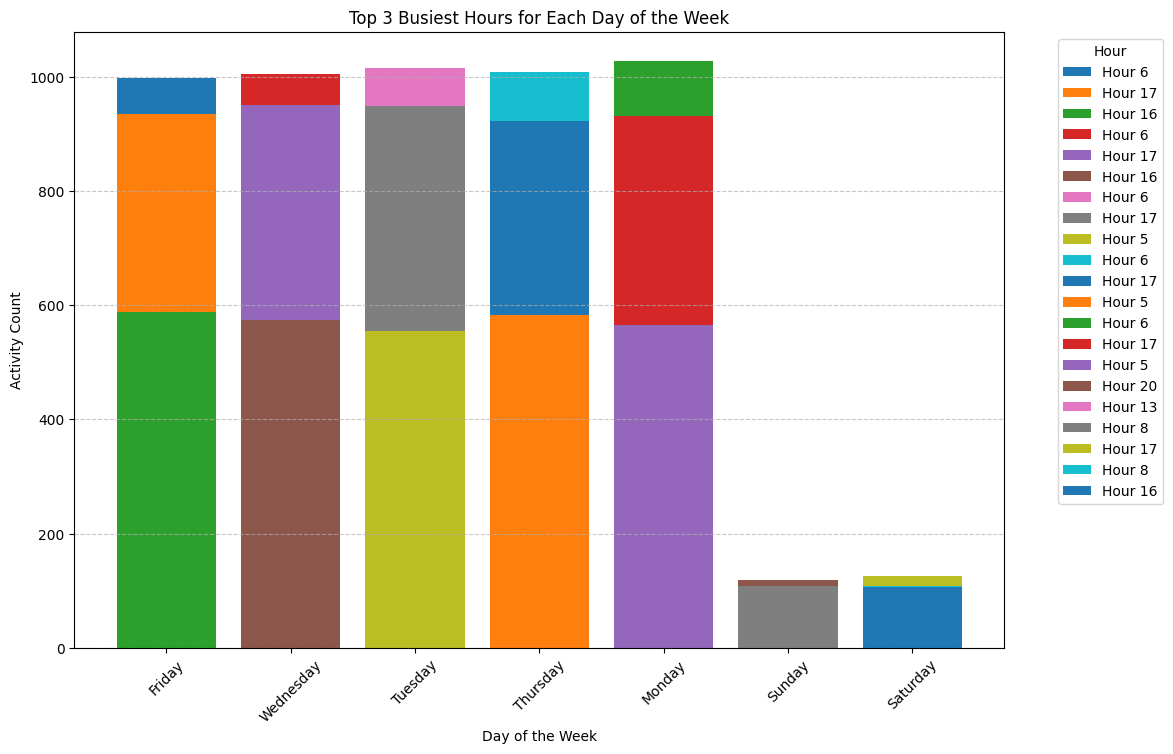

In [544]:
plt.figure(figsize=(12, 8))
for index, row in daily_counts_sorted.iterrows():
    day_of_week = row['tapInDay']
    
    # Get the top 3 busiest hours for the current day
    top_hours = df_cleaned[df_cleaned['tapInDay'] == day_of_week].groupby('tapInHour').size().nlargest(3)
    
    # Plot the top 3 busiest hours for the current day
    for hour, activity_count in top_hours.items():
        plt.bar(day_of_week, activity_count, label=f'Hour {hour}')

plt.title('Top 3 Busiest Hours for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Activity Count')
plt.legend(title='Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

Weekdays have higher distribution of transaction count compared with weekend. It is understandable, showing the amount of people that use Transjakarta for working or going to school/Universities.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17884\1664051954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_busiest_tap_in_stops['TapInStopRegion'] = top_10_busiest_tap_in_stops['tapInStopsName'] + ' (' + top_10_busiest_tap_in_stops['startRegion'] + ')'


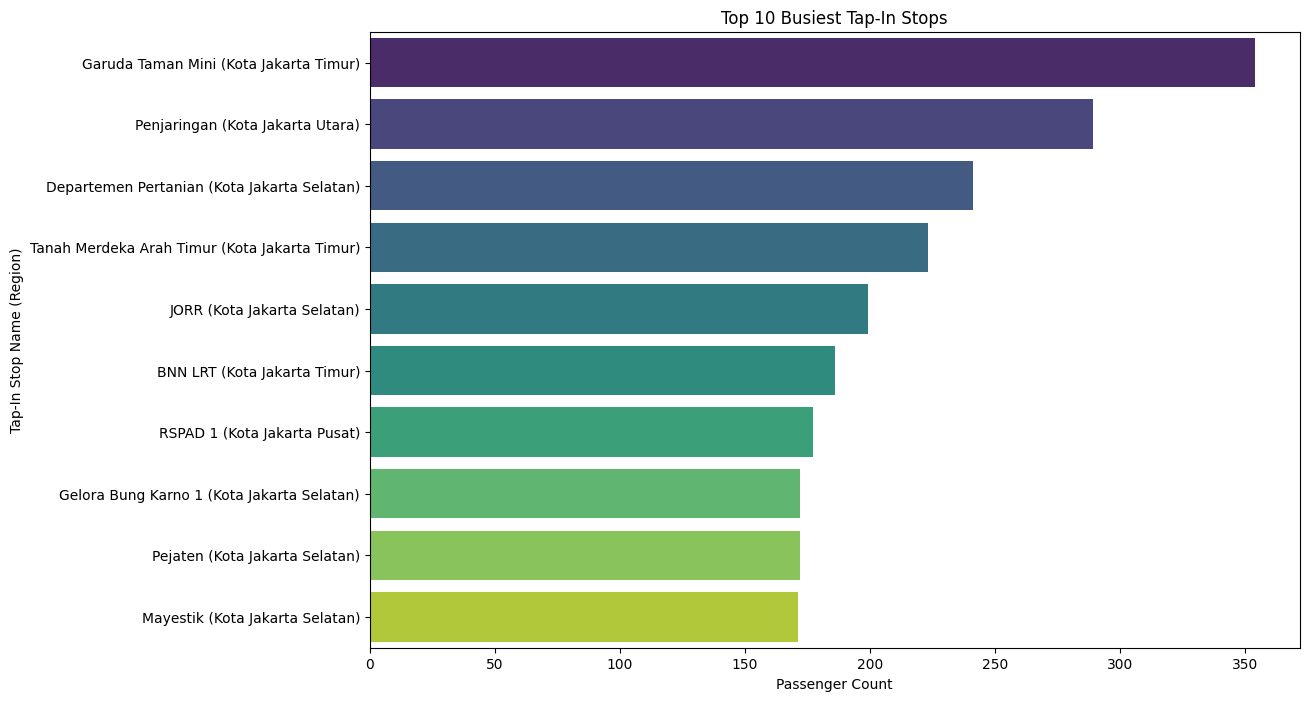

In [548]:
# Combine 'tapInStopsName' and 'startRegion' for a single label
top_10_busiest_tap_in_stops['TapInStopRegion'] = top_10_busiest_tap_in_stops['tapInStopsName'] + ' (' + top_10_busiest_tap_in_stops['startRegion'] + ')'

# Plot the top 10 busiest tap-in stops using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_10_busiest_tap_in_stops,
    y='TapInStopRegion',
    x='PassengerCount',
    palette='viridis'
)
plt.xlabel('Passenger Count')
plt.ylabel('Tap-In Stop Name (Region)')
plt.title('Top 10 Busiest Tap-In Stops')
plt.show()

This graph shown the busiest Tap-In stops. These stations are stations that serves as transit hub, either from a residential area, or office area. Here seen that Transjakarta connect peoples, from other public transport, or directly from their residence.

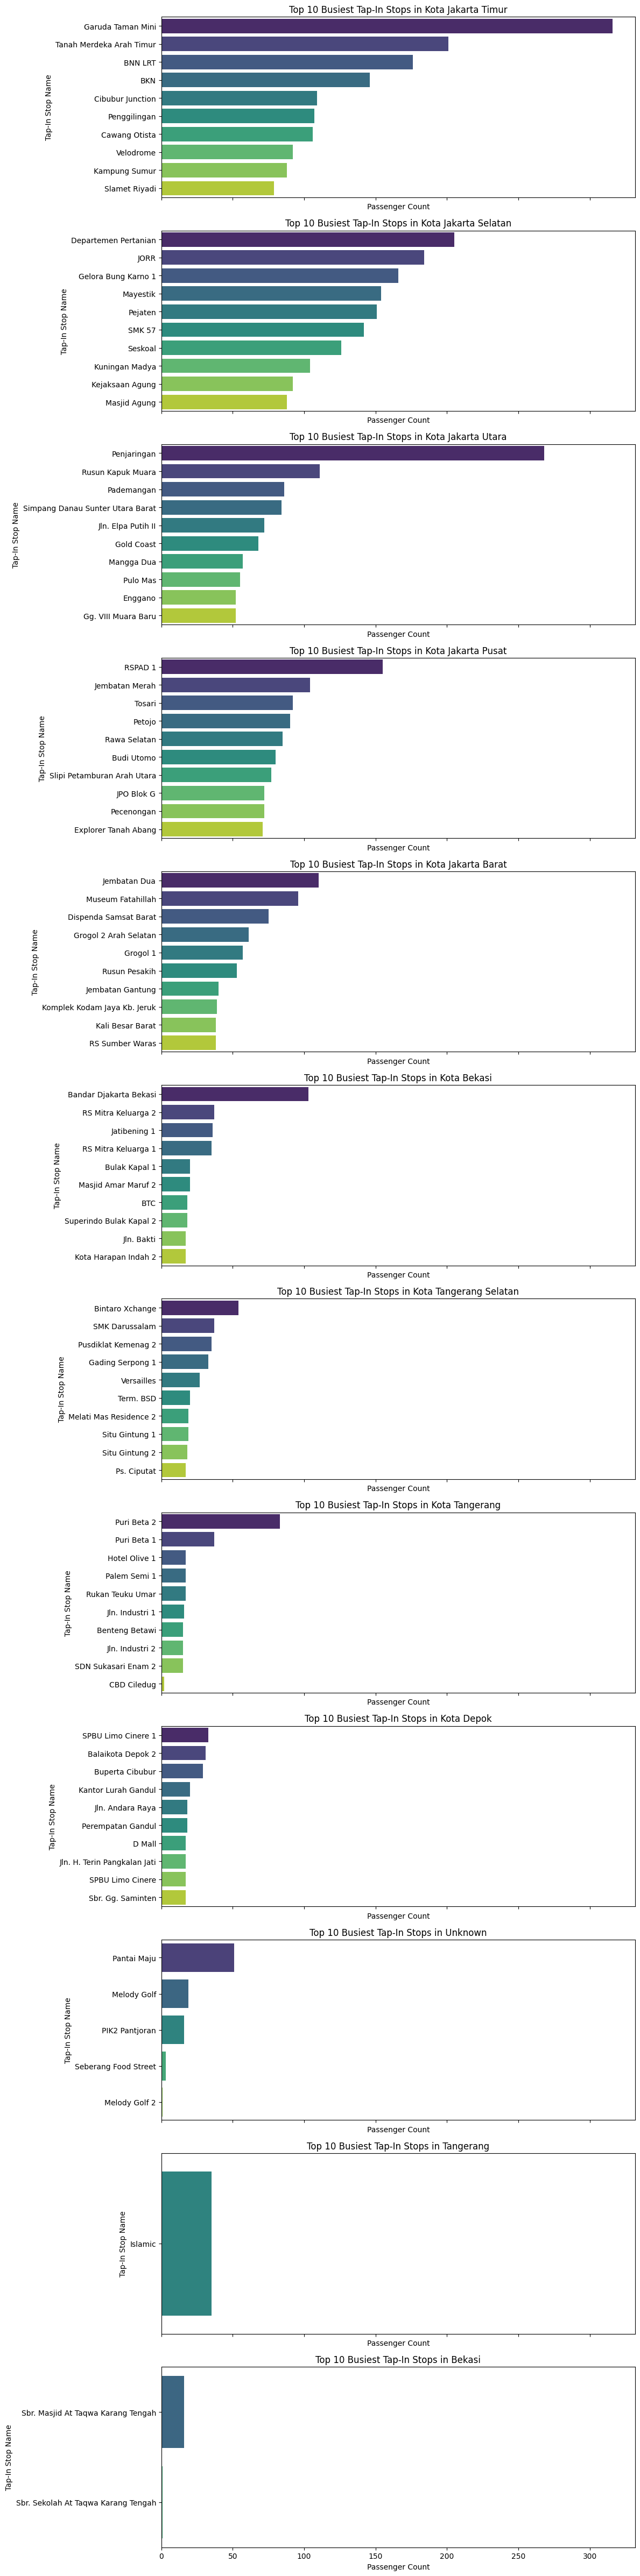

In [554]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Filter the DataFrame to include only weekdays
df_weekdays = df_cleaned[df_cleaned['tapInDay'].isin(weekdays)]

# Group the data by tapInStopsName and startRegion and calculate passenger count
passenger_count_by_tap_in_stops = df_weekdays.groupby(['tapInStopsName', 'startRegion']).size().reset_index(name='PassengerCount')

# Get the top 10 busiest tap-in stops for each region
top_10_by_region = passenger_count_by_tap_in_stops.groupby('startRegion').apply(lambda x: x.nlargest(10, 'PassengerCount')).reset_index(drop=True)

# Calculate total passenger count per region
total_passenger_count_per_region = top_10_by_region.groupby('startRegion')['PassengerCount'].sum().reset_index()

# Sort regions by total passenger count in descending order
sorted_regions = total_passenger_count_per_region.sort_values(by='PassengerCount', ascending=False)['startRegion'].tolist()

# Create subplots
fig, axes = plt.subplots(nrows=len(sorted_regions), ncols=1, figsize=(12, len(sorted_regions) * 4), sharex=True)

# Plot each region
for i, region in enumerate(sorted_regions):
    # Sort the data for the current region
    region_data = top_10_by_region[top_10_by_region['startRegion'] == region].sort_values(by='PassengerCount', ascending=False)
    
    ax = axes[i]
    sns.barplot(
        data=region_data,
        y='tapInStopsName',
        x='PassengerCount',
        palette='viridis',
        ax=ax
    )
    ax.set_title(f'Top 10 Busiest Tap-In Stops in {region}')
    ax.set_ylabel('Tap-In Stop Name')
    ax.set_xlabel('Passenger Count')

plt.tight_layout()
plt.show()

From the graphs shown above, especially in Jakarta Timur and Utara, the station name witht the highest count located near a transit hub, or residences area (Penjaringan). It showcase that the transjakarta is used to act as the connecting hub for the users to reach their workplace by directly using transjakarta, or using other means of public transport as well. Considering the demands, it is recommended that in these stops, the station should have sufficient area to increase the user experience. These station also need to have good connectability with other means of public transport (train, LRT, jaklingko) or even access to hailriding service provider (Gojek, Grab, etc.)

In [536]:
# Group the data by tapOutStopsName and calculate passenger count
passenger_count_by_tap_out_stops = df_cleaned.groupby(['tapOutStopsName','startRegion']).size().reset_index(name='PassengerCount')

# Sort the data based on passenger count in descending order
passenger_count_by_tap_out_stops_sorted = passenger_count_by_tap_out_stops.sort_values(by='PassengerCount', ascending=False)

# Get the top 10 busiest tap-in stops
top_10_busiest_tap_out_stops = passenger_count_by_tap_out_stops_sorted.head(10)

# Display the top 10 busiest tap-in stops
print(top_10_busiest_tap_out_stops)

        tapOutStopsName           startRegion  PassengerCount
1350            Ragunan  Kota Jakarta Selatan             337
2090        Term. Senen    Kota Jakarta Pusat             333
1153       Pinang Ranti    Kota Jakarta Timur             283
734    Kampung Rambutan    Kota Jakarta Timur             250
43                  BKN    Kota Jakarta Timur             250
1103        Penjaringan    Kota Jakarta Utara             200
1274        Puri Beta 2  Kota Jakarta Selatan             189
11           Adam Malik  Kota Jakarta Selatan             178
1981  Summarecon Bekasi           Kota Bekasi             157
781     Kejaksaan Agung  Kota Jakarta Selatan             141


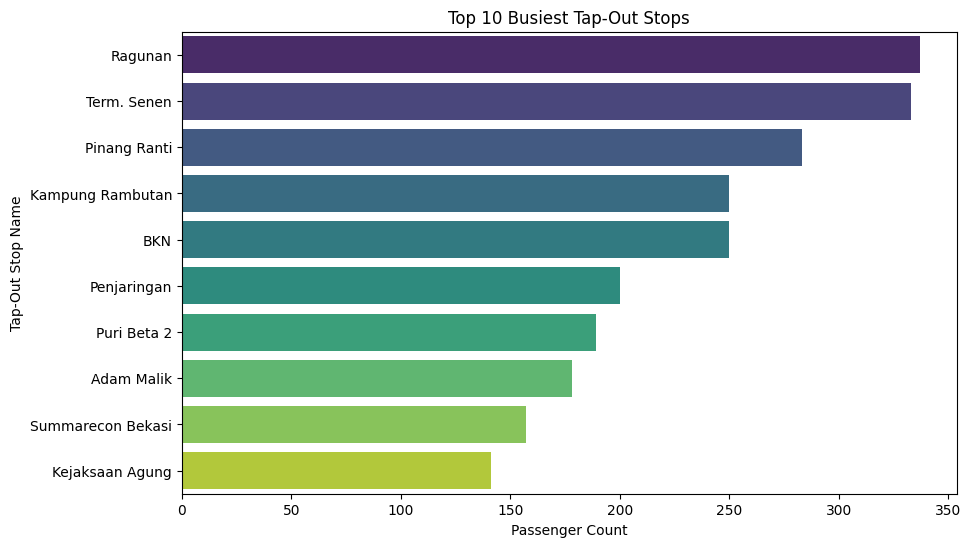

In [572]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_busiest_tap_out_stops, x='PassengerCount', y='tapOutStopsName', palette='viridis')
plt.xlabel('Passenger Count')
plt.ylabel('Tap-Out Stop Name')
plt.title('Top 10 Busiest Tap-Out Stops')
plt.show()

The figures of the top 10- busiest station based on the exit counts also shows transjakarta serves as crucial infrastructure for public transport. The highest count located at the transit-hub, or residence area. This graph backed our statement where these station facilitated the people to travel to their workplace directly (using TJ) or other indirectly by connecting those people to other mean of public transport.

In [562]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33996 entries, 0 to 37899
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transID              33996 non-null  object        
 1   payCardID            33996 non-null  int64         
 2   payCardBank          33996 non-null  object        
 3   payCardName          33996 non-null  object        
 4   payCardSex           33996 non-null  object        
 5   payCardBirthDate     33996 non-null  datetime64[ns]
 6   corridorID           33996 non-null  object        
 7   corridorName         33996 non-null  object        
 8   direction            33996 non-null  float64       
 9   tapInStops           33996 non-null  object        
 10  tapInStopsName       33996 non-null  object        
 11  tapInStopsLat        33996 non-null  float64       
 12  tapInStopsLon        33996 non-null  float64       
 13  stopStartSeq         33996 non-null 

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


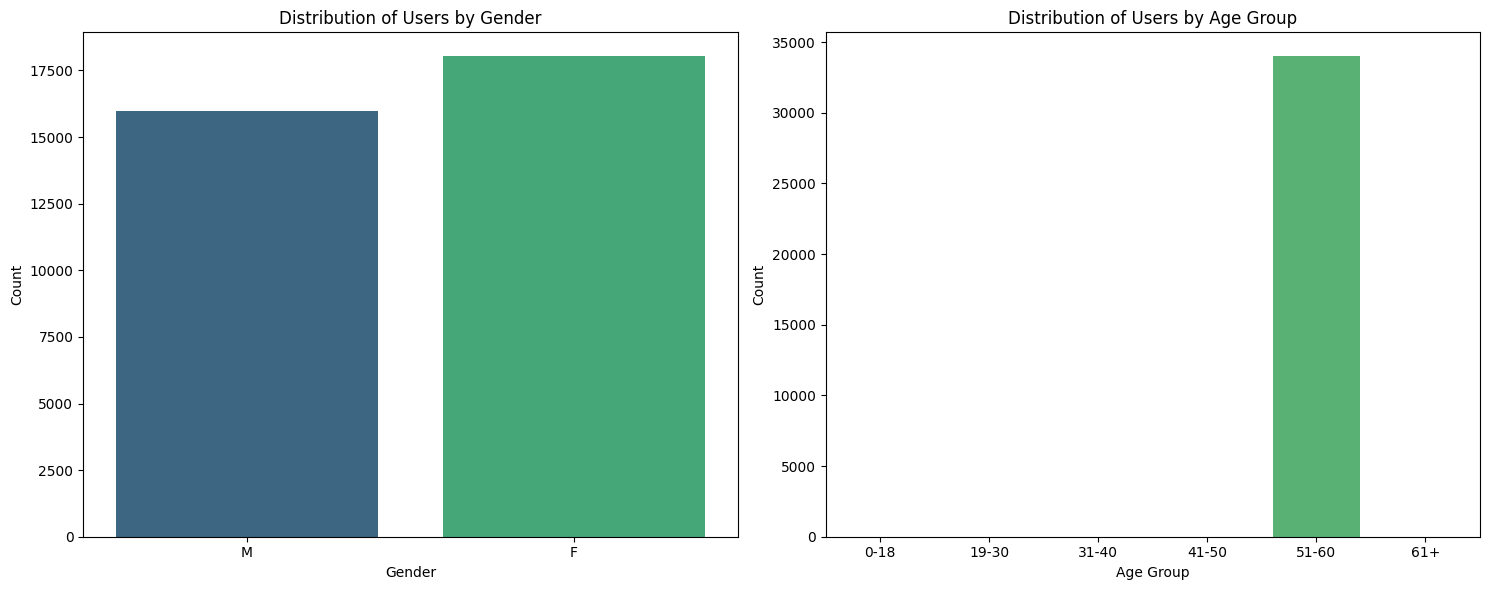

In [561]:

current_year = pd.Timestamp.now().year
df_cleaned['age'] = current_year - df_cleaned['payCardBirthDate'].dt.year

# Define age groups
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

# Categorize users into age groups
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=age_bins, labels=age_labels, right=False)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for gender
sns.countplot(data=df_cleaned, x='payCardSex', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Users by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot for age group
sns.countplot(data=df_cleaned, x='age_group', palette='viridis', ax=axes[1], order=age_labels)
axes[1].set_title('Distribution of Users by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [542]:
# Group the data by corridor and calculate passenger count
passenger_count_by_corridor = df_cleaned.groupby(['corridorName','startRegion']).size().reset_index(name='PassengerCount')

# Sort the data based on passenger count in descending order
passenger_count_by_corridor = passenger_count_by_corridor.sort_values(by='PassengerCount', ascending=False)

# Get the top 10 busiest tap-in stops
top_10_busiest_corridor = passenger_count_by_corridor.head(10)

# Display the top 10 busiest tap-in stops
print(top_10_busiest_corridor)

                                    corridorName           startRegion  \
247                  Ragunan - Gelora Bung Karno  Kota Jakarta Selatan   
198                       Pinang Ranti - Pramuka    Kota Jakarta Timur   
275  Rusun Pondok Bambu - Walikota Jakarta Timur    Kota Jakarta Timur   
34                          Cibubur - Balai Kota    Kota Jakarta Pusat   
42                             Ciledug - Tendean  Kota Jakarta Selatan   
242                        Puri Beta 2 - Tendean  Kota Jakarta Selatan   
91           Kalideres - Bundaran HI via Veteran    Kota Jakarta Barat   
122               Kampung Rambutan - Pondok Gede    Kota Jakarta Timur   
101         Kampung Melayu - Pulo Gebang via BKT    Kota Jakarta Timur   
354                        Tanjung Priok - Pluit    Kota Jakarta Utara   

     PassengerCount  
247             380  
198             347  
275             328  
34              312  
42              309  
242             298  
91              292  
122      

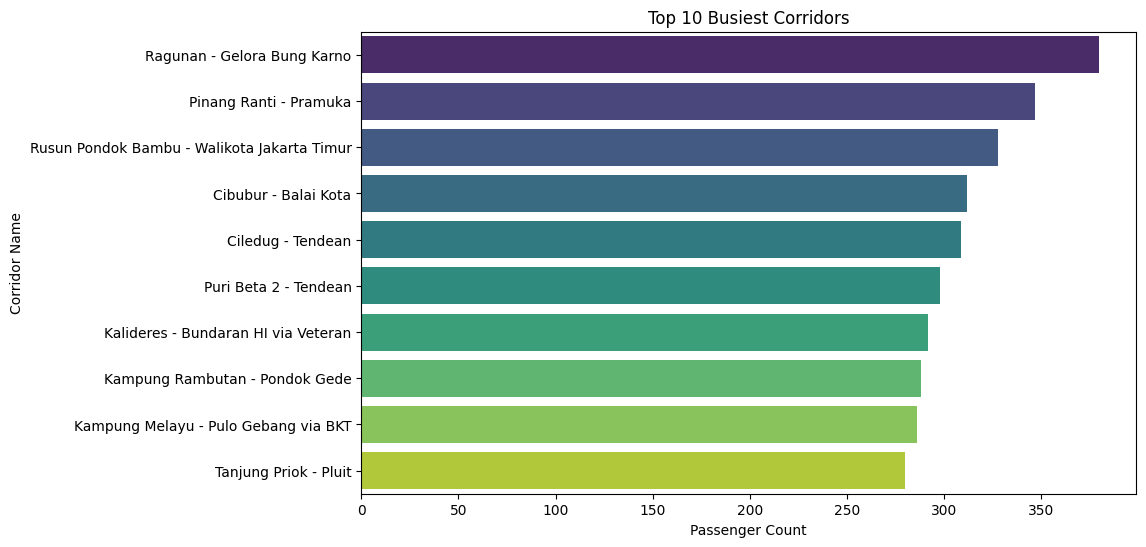

In [573]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_busiest_corridor, x='PassengerCount', y='corridorName', palette='viridis')
plt.xlabel('Passenger Count')
plt.ylabel('Corridor Name')
plt.title('Top 10 Busiest Corridors')
plt.show()

This graph shown how crucial transjakarta to connect jakarta with its satellite city or residentials area. Transjakarta is important for area that has no other transportation means such as pinang ranti-pramuka, or ciledug and puri beta2 - Tendean. The recommendation from this analysis is to increase the frequency of the trips, since there are no other public transport option from their start point. If the transjakarta waiting time is not too long, it will atract more user as alternative for them, instead of them using personal transportation.

In [588]:
# To show data that include only trips to the stop named "Bundaran HI"
df_bundaran_hi = df_cleaned[df_cleaned['tapOutStopsName'] == 'Bundaran HI']

# Group by start region, tap in station, corridor, day, and hour to find the best travel times and average durations
best_times_bundaran_hi = df_bundaran_hi.groupby(['startRegion', 'tapInStopsName', 'corridorName', 'tapInDay', 'tapInHour']).agg({'transID': 'count', 'duration': 'mean'}).reset_index()
best_times_bundaran_hi.columns = ['StartRegion', 'TapInStopsName', 'CorridorName', 'Day', 'Hour', 'PassengerCount', 'AverageDuration']

# Find the best time to travel from each region to Bundaran HI
best_time_per_region_bundaran_hi = best_times_bundaran_hi.loc[best_times_bundaran_hi.groupby('StartRegion')['AverageDuration'].idxmin()]

print("Best Time to Travel from Each Region to Bundaran HI (Based on Lowest Average Durations):")
print(best_time_per_region_bundaran_hi)


Best Time to Travel from Each Region to Bundaran HI (Based on Lowest Average Durations):
             StartRegion            TapInStopsName  \
10    Kota Jakarta Barat                  Grogol 1   
15    Kota Jakarta Pusat                    Tosari   
35  Kota Jakarta Selatan  Pancoran Tugu Arah Barat   

                           CorridorName        Day  Hour  PassengerCount  \
10  Kalideres - Bundaran HI via Veteran  Wednesday   5.0               2   
15    Ragunan - MH Thamrin via Semanggi     Friday   5.0               1   
35             Kampung Rambutan - Monas   Thursday   6.0               2   

    AverageDuration  
10        22.008333  
15        21.466667  
35        31.608333  


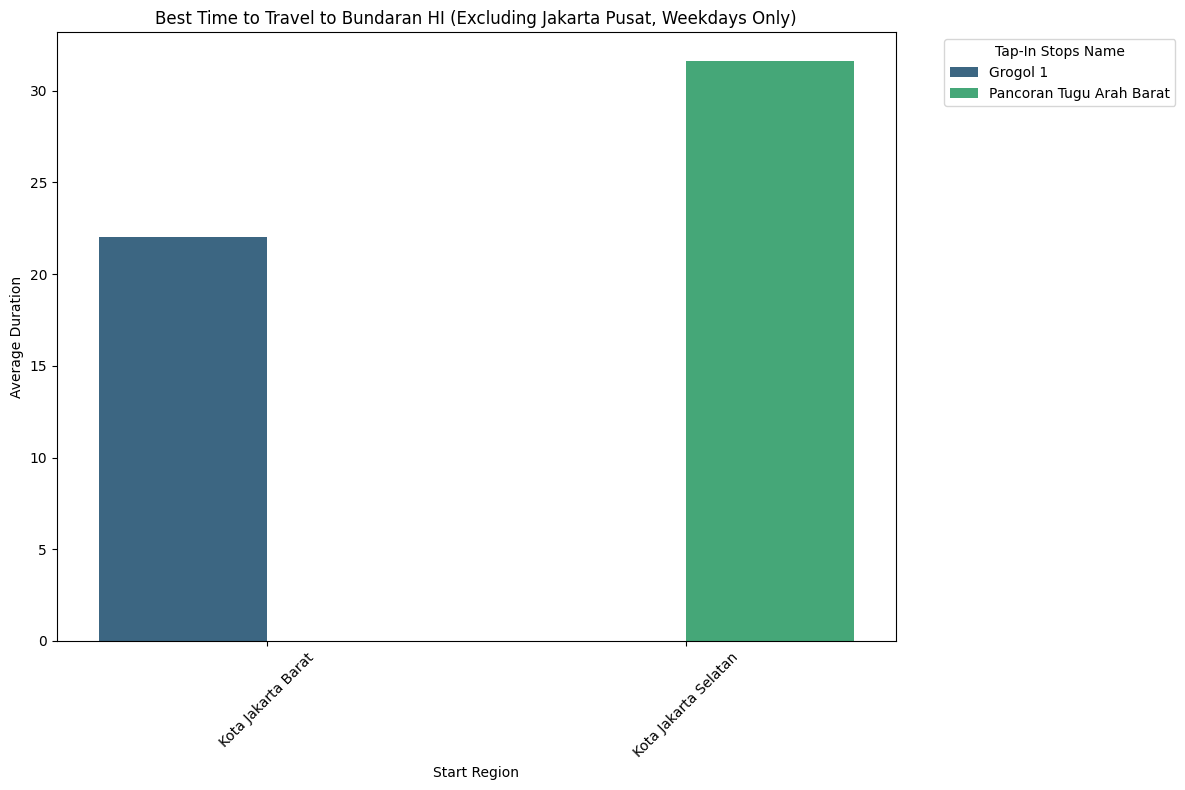

In [596]:
max_distance_stations = best_time_per_region_bundaran_hi.loc[best_time_per_region_bundaran_hi.groupby('StartRegion')['AverageDuration'].idxmax()][['StartRegion', 'TapInStopsName']]

# Merge with best_time_per_region_bundaran_hi 
merged_data = pd.merge(max_distance_stations, best_time_per_region_bundaran_hi, on=['StartRegion', 'TapInStopsName'], how='inner')

# Exclude data for "Jakarta Pusat"
filtered_data = merged_data[merged_data['StartRegion'] != 'Kota Jakarta Pusat']

# Filter data for weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
filtered_data = filtered_data[filtered_data['Day'].isin(weekdays)]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_data, x='StartRegion', y='AverageDuration', hue='TapInStopsName', palette='viridis')
plt.title('Best Time to Travel to Bundaran HI (Excluding Jakarta Pusat, Weekdays Only)')
plt.xlabel('Start Region')
plt.ylabel('Average Duration')
plt.xticks(rotation=45)
plt.legend(title='Tap-In Stops Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [582]:
# Group the data by corridor name and stop name and count the number of passengers for each stop in each corridor
corridor_stop_passenger_count = df_cleaned.groupby(['corridorName', 'tapOutStopsName'])['transID'].count().reset_index()

# Renaming columns
corridor_stop_passenger_count.columns = ['CorridorName', 'StopName', 'PassengerCount']

# Sort the DataFrame by corridor name and passenger count in descending order
sorted_corridor_stops = corridor_stop_passenger_count.sort_values(by=['CorridorName', 'PassengerCount'], ascending=[True, False])

# Display the count of passengers for each stop in the Ciledug corridor
tendean_stops = sorted_corridor_stops[sorted_corridor_stops['CorridorName'] == 'Ciledug - Tendean']
print("Passenger Count for Each Stop in Ciledug - Tendean Corridor:")
print(tendean_stops)

Passenger Count for Each Stop in Ciledug - Tendean Corridor:
          CorridorName        StopName  PassengerCount
316  Ciledug - Tendean       Tirtayasa              60
304  Ciledug - Tendean      Adam Malik              53
312  Ciledug - Tendean      Rawa Barat              41
308  Ciledug - Tendean            JORR              39
313  Ciledug - Tendean         Seskoal              38
306  Ciledug - Tendean           CSW 1              19
307  Ciledug - Tendean         Cipulir              19
309  Ciledug - Tendean  Kebayoran Lama              19
314  Ciledug - Tendean        Swadarma              19
317  Ciledug - Tendean          Velbak              18
305  Ciledug - Tendean     CBD Ciledug              17
310  Ciledug - Tendean        Mayestik               2
315  Ciledug - Tendean         Tendean               2
311  Ciledug - Tendean     Puri Beta 2               1


In [583]:
# Group the data by corridor name and stop name and count the number of passengers for each stop in each corridor
corridor_stop_passenger_count = df_cleaned.groupby(['corridorName', 'tapInStopsName'])['transID'].count().reset_index()

# Rename the columns for clarity
corridor_stop_passenger_count.columns = ['CorridorName', 'StopName', 'PassengerCount']

# Sort the DataFrame by corridor name and passenger count in descending order
sorted_corridor_stops = corridor_stop_passenger_count.sort_values(by=['CorridorName', 'PassengerCount'], ascending=[True, False])

# Display the count of passengers for each stop in the Ciledug
tendean_start = sorted_corridor_stops[sorted_corridor_stops['CorridorName'] == 'Ciledug - Tendean']
print("Passenger Count for Each Stop in Ciledug - Tendean Corridor:")
print(tendean_start)

Passenger Count for Each Stop in Ciledug - Tendean Corridor:
          CorridorName        StopName  PassengerCount
333  Ciledug - Tendean            JORR              71
338  Ciledug - Tendean         Seskoal              60
335  Ciledug - Tendean        Mayestik              42
332  Ciledug - Tendean         Cipulir              39
339  Ciledug - Tendean        Swadarma              38
331  Ciledug - Tendean           CSW 1              20
340  Ciledug - Tendean       Tirtayasa              20
334  Ciledug - Tendean  Kebayoran Lama              19
336  Ciledug - Tendean     Puri Beta 1              19
337  Ciledug - Tendean     Puri Beta 2              17
330  Ciledug - Tendean     CBD Ciledug               2


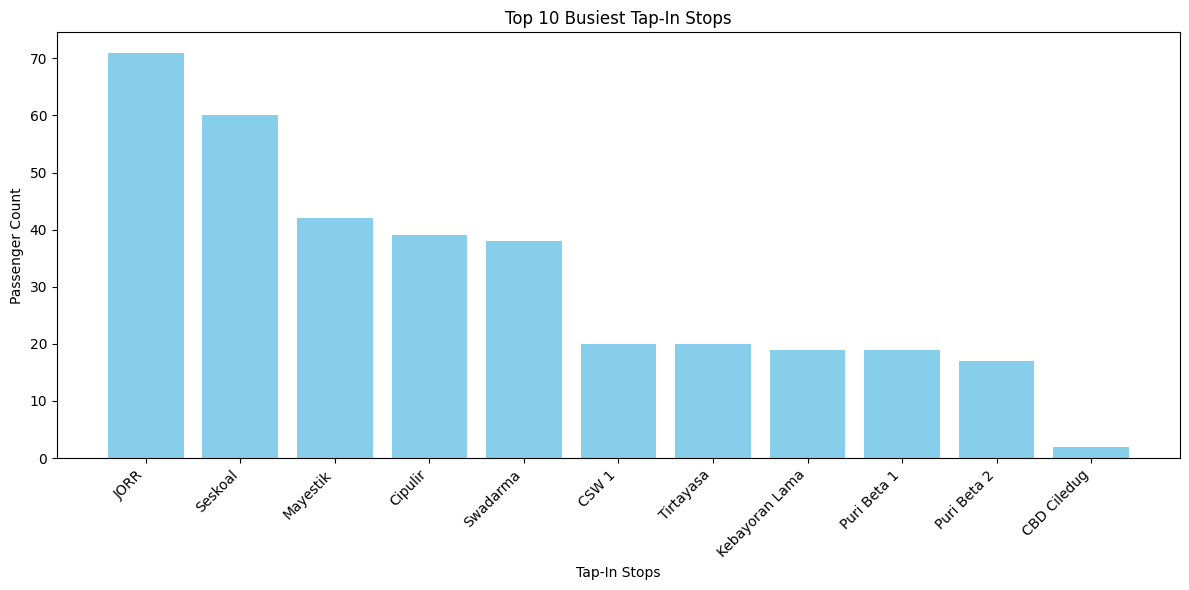

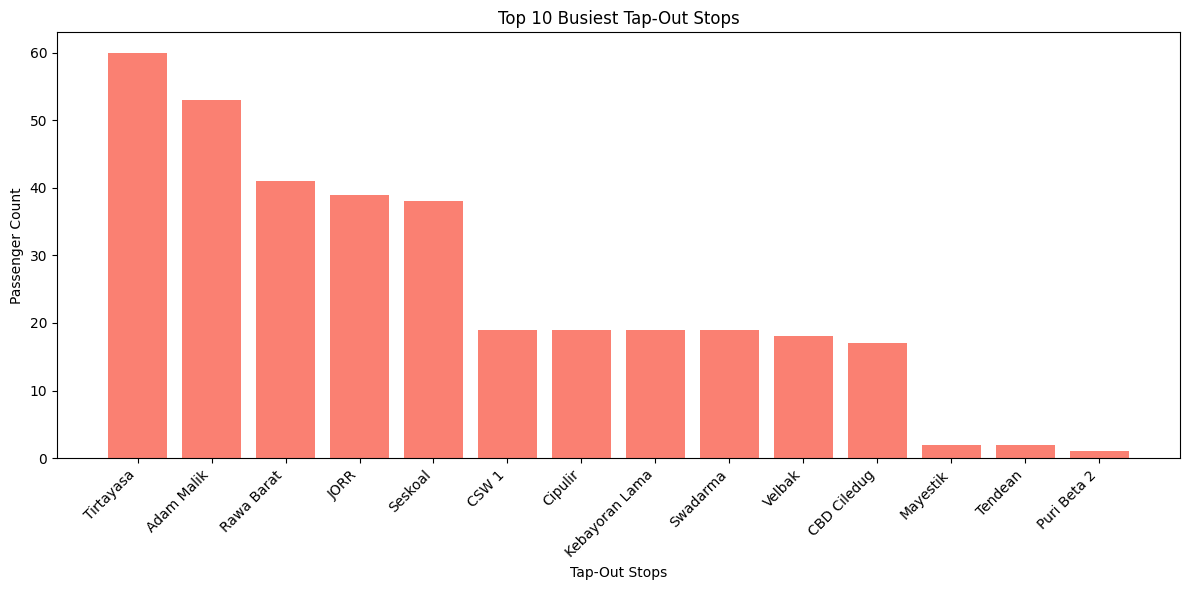

In [585]:
# Plot the busiest tap-in stops
plt.figure(figsize=(12, 6))
plt.bar(tendean_start['StopName'], tendean_start['PassengerCount'], color='skyblue')
plt.xlabel('Tap-In Stops')
plt.ylabel('Passenger Count')
plt.title('Top {} Busiest Tap-In Stops'.format(top_n))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Plot the passenger counts that exit through the Ciledug - Tendean Corridor 
plt.figure(figsize=(12, 6))
plt.bar(tendean_stops['StopName'], tendean_stops['PassengerCount'], color='salmon')
plt.xlabel('Tap-Out Stops')
plt.ylabel('Passenger Count')
plt.title('Top {} Busiest Tap-Out Stops'.format(top_n))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the graph shown above, both the busiest tap-in and tap-out stops in the ciledug - tendean corridor is located at the southern-part of jakarta, but not in cildeug. The top 4 tap in stations located in a connecting hub, in which in seskoal and swadarma located near universities. Meanwhile for the top 5 busiest tap Out stops located in southern-part of Jakarta, also shows the connecting point, in which in these stops, the user tapped out to switch to other means of transport such as other corridors, MRT (existed in CSW 1), Train (Kebayoran Lama, Velbak). The recommendation from this analysis is to make the access for transfer as easy as possible, to increase the user experience and attract more users.

In [426]:
passenger_count_by_stop = df_cleaned.groupby('tapOutStopsName')['transID'].count().reset_index()

# Rename the columns for clarity
passenger_count_by_stop.columns = ['StopName', 'PassengerCount']

# Sort the DataFrame by passenger count in descending order
sorted_stops = passenger_count_by_stop.sort_values(by='PassengerCount', ascending=False)

print("Passenger Count for Each Tap Out Stop:")
print(sorted_stops)

Passenger Count for Each Tap Out Stop:
                                  StopName  PassengerCount
1803                           Term. Senen             350
1129                               Ragunan             337
967                           Pinang Ranti             303
34                                     BKN             288
622                       Kampung Rambutan             251
...                                    ...             ...
1420        Sbr. PAUD Bina Keluarga Balita               1
386                  Jln. Budi Mulia Utara               1
962                        Pesing Polgar 1               1
1423  Sbr. Panti Asuhan Anak Putra Utama 1               1
541                      Jln. Pule Ciracas               1

[1877 rows x 2 columns]


In [428]:
# Filter the DataFrame where startRegion is different from endRegion
passengers_across_regions = df_cleaned[df_merged['startRegion'] != df_merged['endRegion']]

# Display the first 10 rows of the resulting DataFrame
print(passengers_across_regions.head(10))

           transID         payCardID payCardBank               payCardName  \
0   EIIW227B8L34VB   180062659848800      emoney            Bajragin Usada   
4   VMLO535V7F95NJ      570928206772       flazz           Embuh Mardhiyah   
8   OIHS248V7S72EB  6510013988638519         dki    Cagak Maheswara, S.Sos   
20  SBPQ144H4S45RA      502034641014       flazz  Adikara Kurniawan, S.Sos   
22  MEFW094B7A84RS   378872365541693      emoney            Aslijan Irawan   
29  MSFD430X8W13TO  4384653483539395         dki    Cut Hana Maulana, S.H.   
35  NZCE828E4J23AW   379334845079777      emoney            Salman Ramadan   
40  RLLZ887W3V14WZ  4947438345710982         dki             Rahayu Rahayu   
42  UANX737M9L25GI      574726750023       flazz        drg. Lukita Rajata   
61  OPNL705D9K64FN   340065298083181      emoney          Tgk. Garda Utami   

   payCardSex  payCardBirthDate corridorID  \
0           M              2008          5   
4           M              1982         12   
8  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17884\1569821521.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  passengers_across_regions = df_cleaned[df_merged['startRegion'] != df_merged['endRegion']]


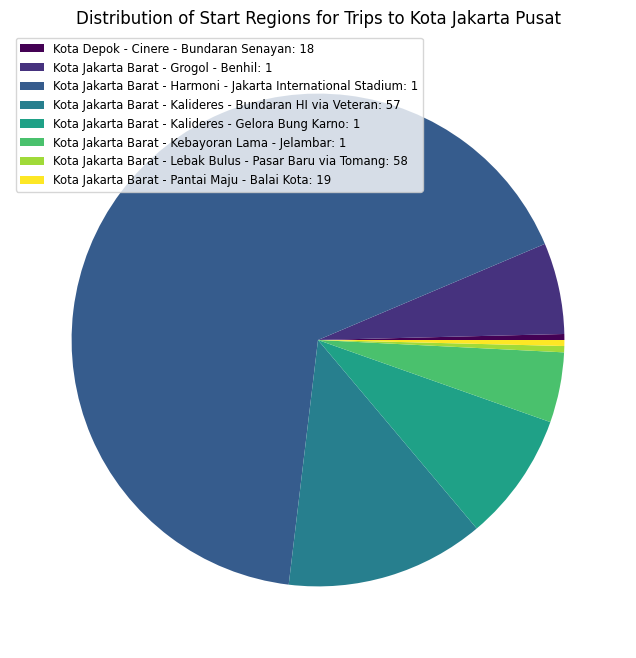

In [608]:
# Filter the DataFrame where endRegion is "Kota Jakarta Pusat"
passengers_to_jakarta_pusat = df_cleaned[df_cleaned['endRegion'] == 'Kota Jakarta Pusat']

# Group by startRegion and corridorName, and count the occurrences
start_region_corridor_counts = passengers_to_jakarta_pusat.groupby(['startRegion', 'corridorName']).size().reset_index(name='PassengerCount')

# Aggregate the counts by startRegion and sum the PassengerCount
start_region_counts = start_region_corridor_counts.groupby('startRegion')['PassengerCount'].sum()

# Create a list of labels combining startRegion and corridorName
labels = start_region_corridor_counts.apply(lambda row: f"{row['startRegion']} - {row['corridorName']}", axis=1)

# Define a custom color palette with unique colors for each start region
colors = plt.cm.viridis(np.linspace(0, 1, len(start_region_counts)))

# Plotting the pie chart with custom colors
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(start_region_counts, colors=colors)
plt.title('Distribution of Start Regions for Trips to Kota Jakarta Pusat')

# Display counts in legend with startRegion and corridorName
legend_labels = [f"{label}: {count}" for label, count in zip(labels, start_region_corridor_counts['PassengerCount'])]
plt.legend(patches, legend_labels, loc="best", fontsize='small')

plt.show()

Here shown that, for end region Jakarta Pusat or Central Jakarta from other Jakarta's region. It is pretty accomodating. This shows that Transjakarta offers several option, to goes to the most central part of Jakarta. This graph is sorted by the transactions counts, and this is shows that ease of access for transfer is really crucial, because several option offered means, transjakarta have to be able to facilitate all the passenger from different kinds of corridors.

## Saving the cleaned dataset into new csv file for more thorough analysis using Tableau

In [607]:
df_cleaned.to_csv('transjakarta-cleaned.csv', index=False)